Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Uvod u znanost o podacima 2023/2024 
https://www.fer.unizg.hr/predmet/uuzop

------------------------------

### Projekt: Early-Stage Alzheimer's Disease Prediction Using Machine Learning Models

*https://www.frontiersin.org/articles/10.3389/fpubh.2022.853294/full*

**Veronika Žunar, 0036525058**

------------------------------

# Priprema i vizualizacija podataka

Cilj ovog dijela projekta je upoznati se s podacima. Studenti trebaju pročitati odabrani članak te preuzeti podatke koji su korišteni. Nakon toga potrebno je upoznati se s podacima.
Smjernice kako to učiniti su:  
- učitati podatke  
- provjeriti koji sve tipovi podataka postoje i prikazati deskriptivnu statistiku podataka  
- provjeriti postoje li nedostajuće vrijednosti i stršeće vrijednosti  
- vizualizirati podatke na nekoliko različitih načina (npr. histogram značajki, linijski
      dijagrami vremenskih nizova, točkasti dijagrami u ovisnosti o ciljnoj klasi, …)  
- …  

Studenti nisu ograničeni isključivo na ranije navedene stavke, one služe samo kao smjernice. Tijekom izrade ovog dijela projekta, ne morate se previše obazirati na stvari koje su radili autori u znanstvenom radu, već se trebate samostalno i prema vlastitom nahođenju upoznati s korištenim skupom podataka.

Rok predaje: **10.11.2023.**

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Učitavanje podataka

In [3]:
df = pd.read_csv(".\dataset\oasis_longitudinal.csv")

In [4]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [5]:
cols = df.columns
desc = ["Subject Identification", "MRI Identification", "Group of patient (classification)", "Ordinal number of visit","MR delay", "Gender (M if Male, F if Female)", "Handedness", "Age in years", "Years of education", "Socio Economic Status", "Mini Mental State Examination", "Clinical Dementia Rating", "Estimated Total Intracranial Volume", "Normalize Whole Brain Volume", "Atlas Scaling Factor"]
types = df.dtypes

for col, d, typ in zip(cols, desc, types):
    print(f'\033[1m{col}\033[0m - {d} \033[1m[{typ}]\033[0m')

Subject ID - Subject Identification [object]
MRI ID - MRI Identification [object]
Group - Group of patient (classification) [object]
Visit - Ordinal number of visit [int64]
MR Delay - MR delay [int64]
M/F - Gender (M if Male, F if Female) [object]
Hand - Handedness [object]
Age - Age in years [int64]
EDUC - Years of education [int64]
SES - Socio Economic Status [float64]
MMSE - Mini Mental State Examination [float64]
CDR - Clinical Dementia Rating [float64]
eTIV - Estimated Total Intracranial Volume [int64]
nWBV - Normalize Whole Brain Volume [float64]
ASF - Atlas Scaling Factor [float64]


### 2. Prikaz tipova podataka i deskriptivne statistike

In [6]:
m, n = df.shape
print(f'Broj stupaca dataseta: {n}')
print(f'Broj redaka dataseta: {m}')

Broj stupaca dataseta: 15
Broj redaka dataseta: 373


In [7]:
sub_id = df['Subject ID'].unique()
num_subjects = len(sub_id)
print(f'Broj osoba uključenih u istraživanje: {num_subjects}')

handedness0 = df['Hand'].unique()
print(f'Jača ruka ispitanika: {handedness0}')

sex0 = df['M/F'].unique()
print(f'Spol ispitanika: {sex0}')

ages = df['Age'].unique()
print(f'Životna dob ispitanika: {ages}')

educ = df['EDUC'].unique()
print(f'Godine školovanja: {educ}')

ses = df['SES'].unique()
print(f'Tipovi socio-ekonomskog statusa: {ses}')

print()

groups0 = df['Group'].unique()
num_groups = len(groups0)
print(f'Rezultati podijeljeni u *{num_groups}* grupe: {groups0}')

visits = df['Visit'].unique()
print(f'Broj posjeta: {visits}')

cdr = df['CDR'].unique()
print(f'Klinički rang demencije: {cdr}')

Broj osoba uključenih u istraživanje: 150
Jača ruka ispitanika: ['R']
Spol ispitanika: ['M' 'F']
Životna dob ispitanika: [87 88 75 76 80 90 83 85 71 73 93 95 68 69 66 78 81 82 77 86 92 84 72 61
 64 74 60 62 91 79 89 70 94 97 65 67 63 96 98]
Godine školovanja: [14 12 18 16  8 20 13  6 17 15 23 11]
Tipovi socio-ekonomskog statusa: [ 2. nan  3.  4.  1.  5.]

Rezultati podijeljeni u *3* grupe: ['Nondemented' 'Demented' 'Converted']
Broj posjeta: [1 2 3 4 5]
Klinički rang demencije: [0.  0.5 1.  2. ]


In [8]:
df_copy = df.copy()

#### Pretvorba ne-numeričkih značajki u numeričke

In [9]:
label_encoder = LabelEncoder()
df_copy['M/F'] = label_encoder.fit_transform(df_copy['M/F'])
sex = df_copy['M/F'].unique()
print(f'Spol ispitanika: {sex} što odgovara oznakama {sex0}')

df_copy['Hand'] = label_encoder.fit_transform(df_copy['Hand'])
handedness = df_copy['Hand'].unique()
print(f'Jača ruka ispitanika: {handedness} što odgovara oznakama {handedness0}')

group_mapping = {'Nondemented': 0, 'Demented': 1, 'Converted': 2}
df_copy['Group'] = df['Group'].map(group_mapping)
groups = df_copy['Group'].unique()
print(f'Rezultati podijeljeni u *{num_groups}* grupe: {groups} što odgovara oznakama {groups0}')

Spol ispitanika: [1 0] što odgovara oznakama ['M' 'F']
Jača ruka ispitanika: [0] što odgovara oznakama ['R']
Rezultati podijeljeni u *3* grupe: [0 1 2] što odgovara oznakama ['Nondemented' 'Demented' 'Converted']


In [10]:
df_copy.describe()

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,373.0,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,0.589812,1.882038,595.104558,0.428954,0.0,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.664461,0.922843,635.485118,0.495592,0.0,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,0.000000,1.000000,0.000000,0.000000,0.0,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,0.000000,1.000000,0.000000,0.000000,0.0,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,0.000000,2.000000,552.000000,0.000000,0.0,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,1.000000,2.000000,873.000000,1.000000,0.0,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,2.000000,5.000000,2639.000000,1.000000,0.0,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


**count**: Broj neprekidnih (non-null) vrijednosti u svakom stupcu.  
**mean**: Srednja vrijednost, aritmetička sredina svih vrijednosti u stupcu.  
**std**: Standardna devijacija, mjera raspršenosti podataka koja pokazuje koliko su vrijednosti razdvojene od srednje vrijednosti.  
**min**: Minimum, najmanja vrijednost u stupcu.  
**25%**: Prvi kvartil (25. percentil) - vrijednost ispod koje se nalazi 25% podataka.  
**50%**: Drugi kvartil (50. percentil) - medijan, srednja vrijednost kad su podaci sortirani.  
**75%**: Treći kvartil (75. percentil) - vrijednost ispod koje se nalazi 75% podataka.  
**max**: Maksimum, najveća vrijednost u stupcu.  

Proučavajući ovu tablicu moćemo uočiti da za SES i MMSE nedostaje nekoliko zapisa.

### 3. Provjera nedostajućih i stršećih vrijednosti

#### Nedostajuće vrijednosti SES i MMSE

In [11]:
df_copy.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

#### Dodavanje nedostajućih vrijednosti

In [12]:
df_copy.loc[df_copy['SES'].isnull(), 'SES'] = df_copy.loc[:, 'SES'].median()
df_copy.loc[df_copy['MMSE'].isnull(), 'MMSE'] = df_copy.loc[:, 'MMSE'].median()

ses = df_copy['SES'].unique()
print(f'Tipovi socio-ekonomskog statusa: {ses}')

mmse = df_copy['MMSE'].unique()
print(f'Mini mental state examination: {mmse}')

df_copy.isnull().sum()

Tipovi socio-ekonomskog statusa: [2. 3. 4. 1. 5.]
Mini mental state examination: [27. 30. 23. 28. 22. 29. 24. 21. 16. 25. 26. 15. 20. 19.  7.  4. 17. 18.]


Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

#### Stršeće vrijednosti

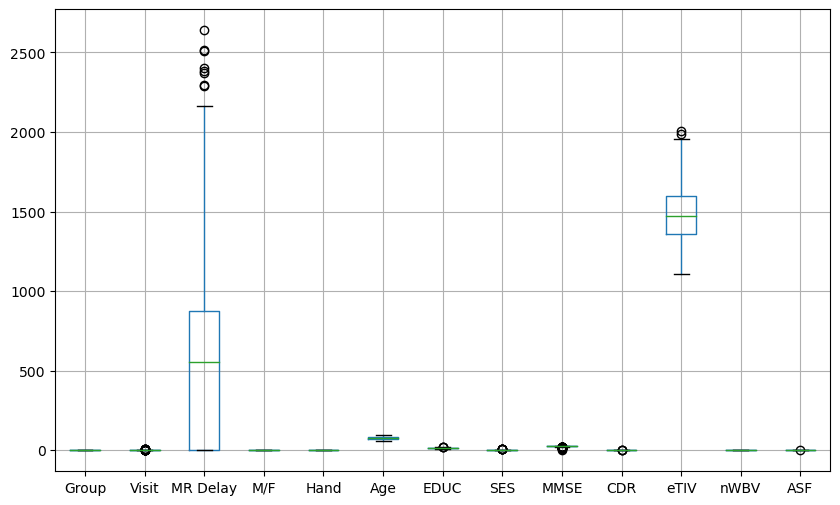

In [13]:
plt.figure(figsize=(10, 6))
df_copy.boxplot()
plt.show()

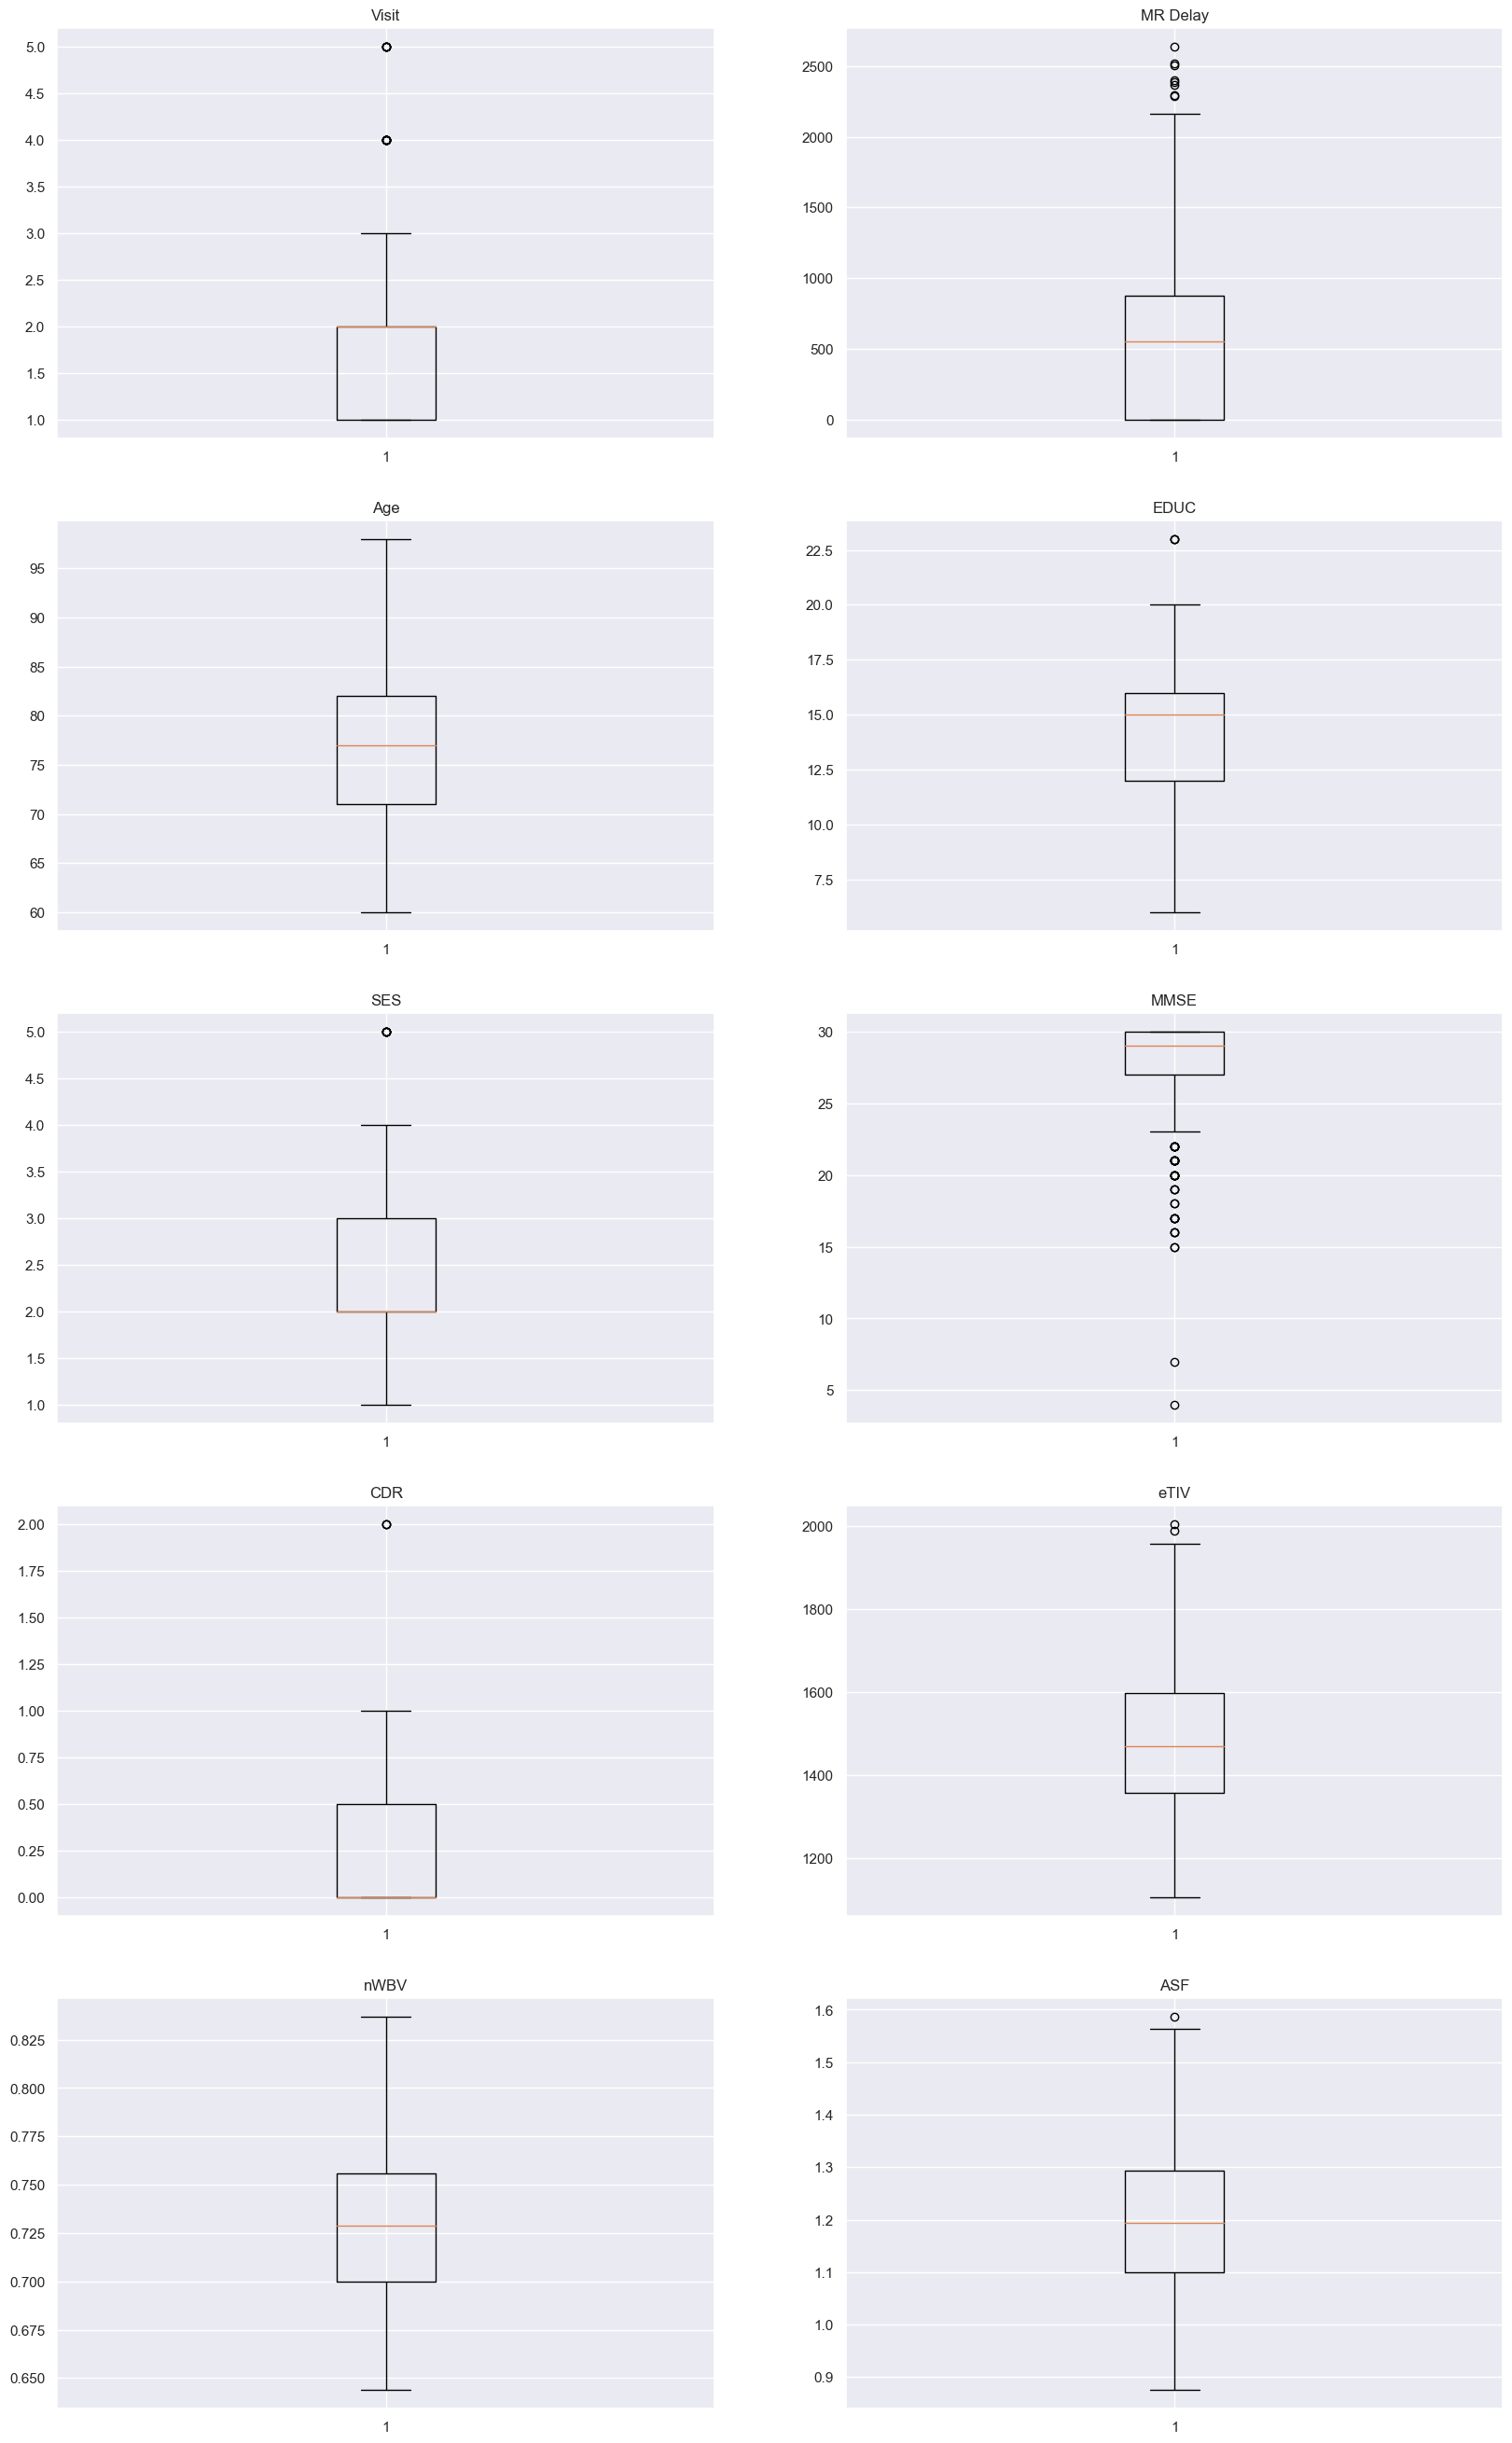

In [277]:
filtered = ['Visit', 'MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

plt.figure(figsize=(20,40))
for i, col in enumerate(filtered):
    plt.subplot(6,2,i+1)
    plt.boxplot(df_copy[col])
    plt.title(col)

plt.show()

### 4. Vizualizacija podataka

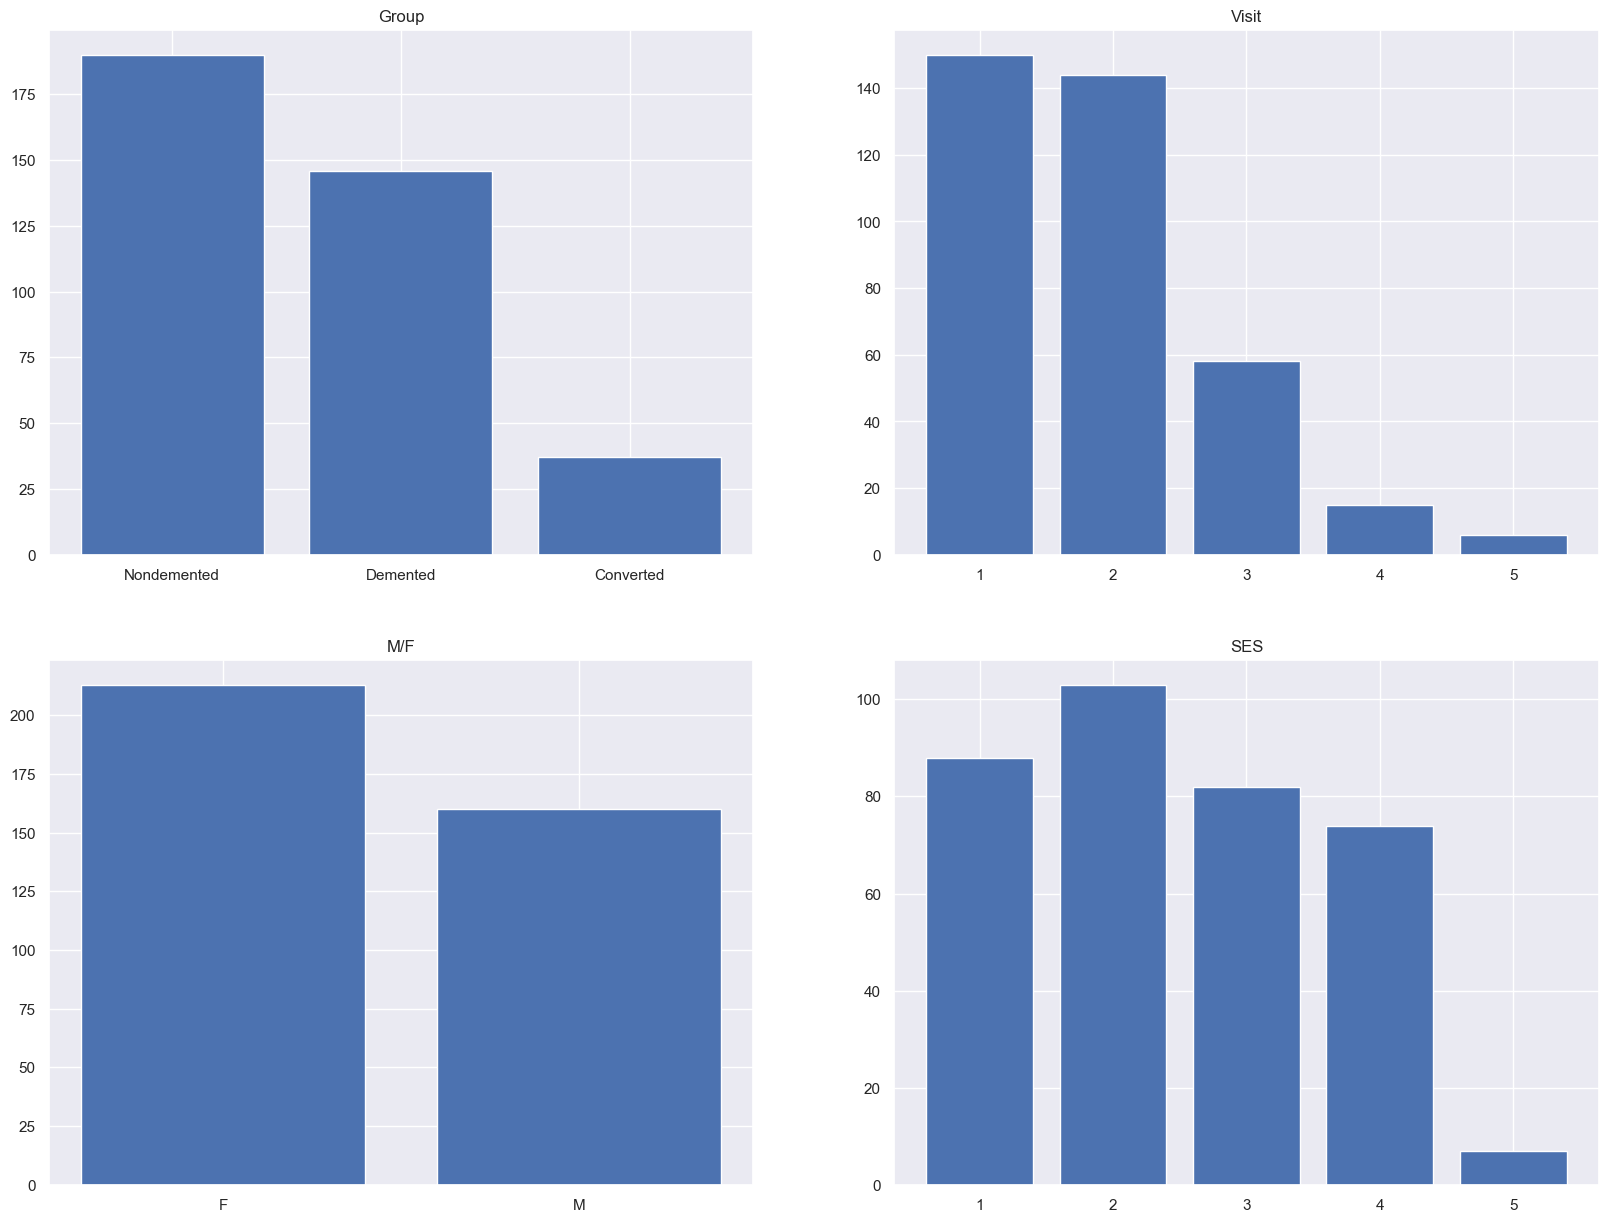

In [278]:
plt.figure(figsize=(20,15))

filtered = ['Group', 'Visit', 'M/F', 'SES']

for i, col in enumerate(filtered):
    plt.subplot(2,2,i+1)
    group_counts = df[col].value_counts()
    group_names = group_counts.index
    plt.bar(group_names, group_counts)
    plt.title(col)

plt.show()

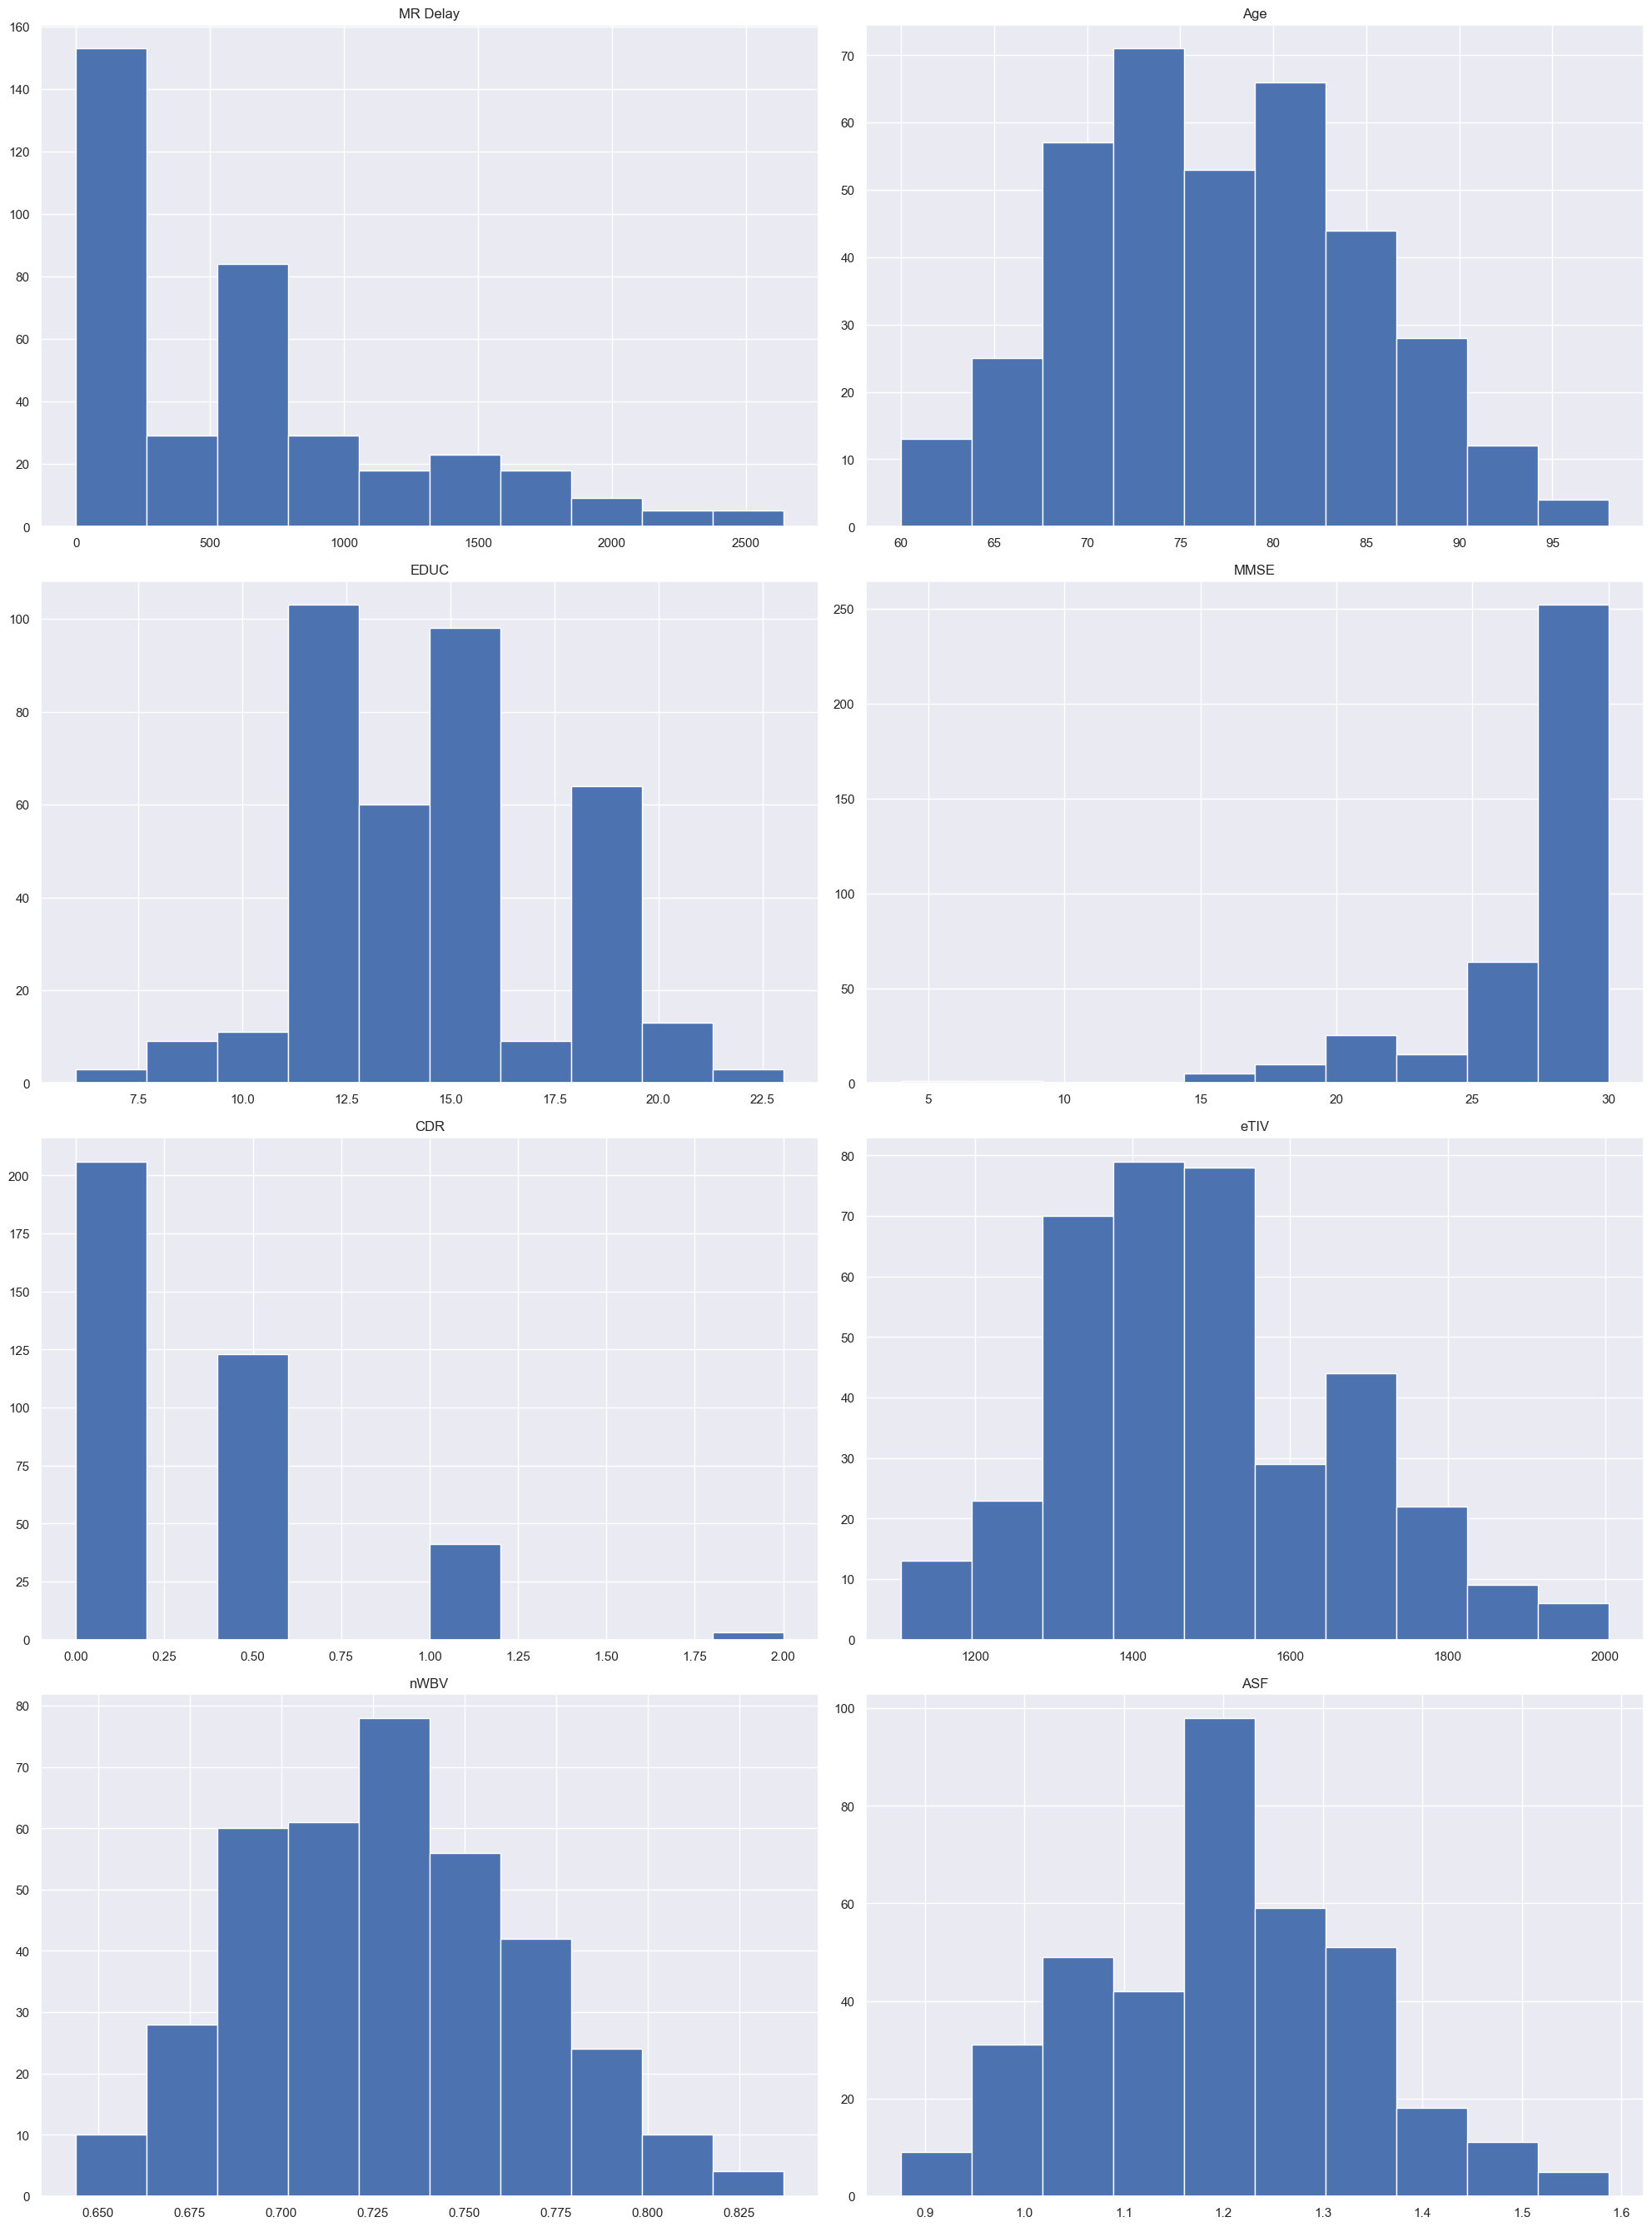

In [279]:
plt.figure(figsize=(20,40))

filtered = ['MR Delay', 'Age', 'EDUC', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

for i, col in enumerate(filtered):
    plt.subplot(6,2,i+1)
    plt.hist(df_copy[col], bins=10)
    plt.title(col)
    
plt.tight_layout()
plt.show()

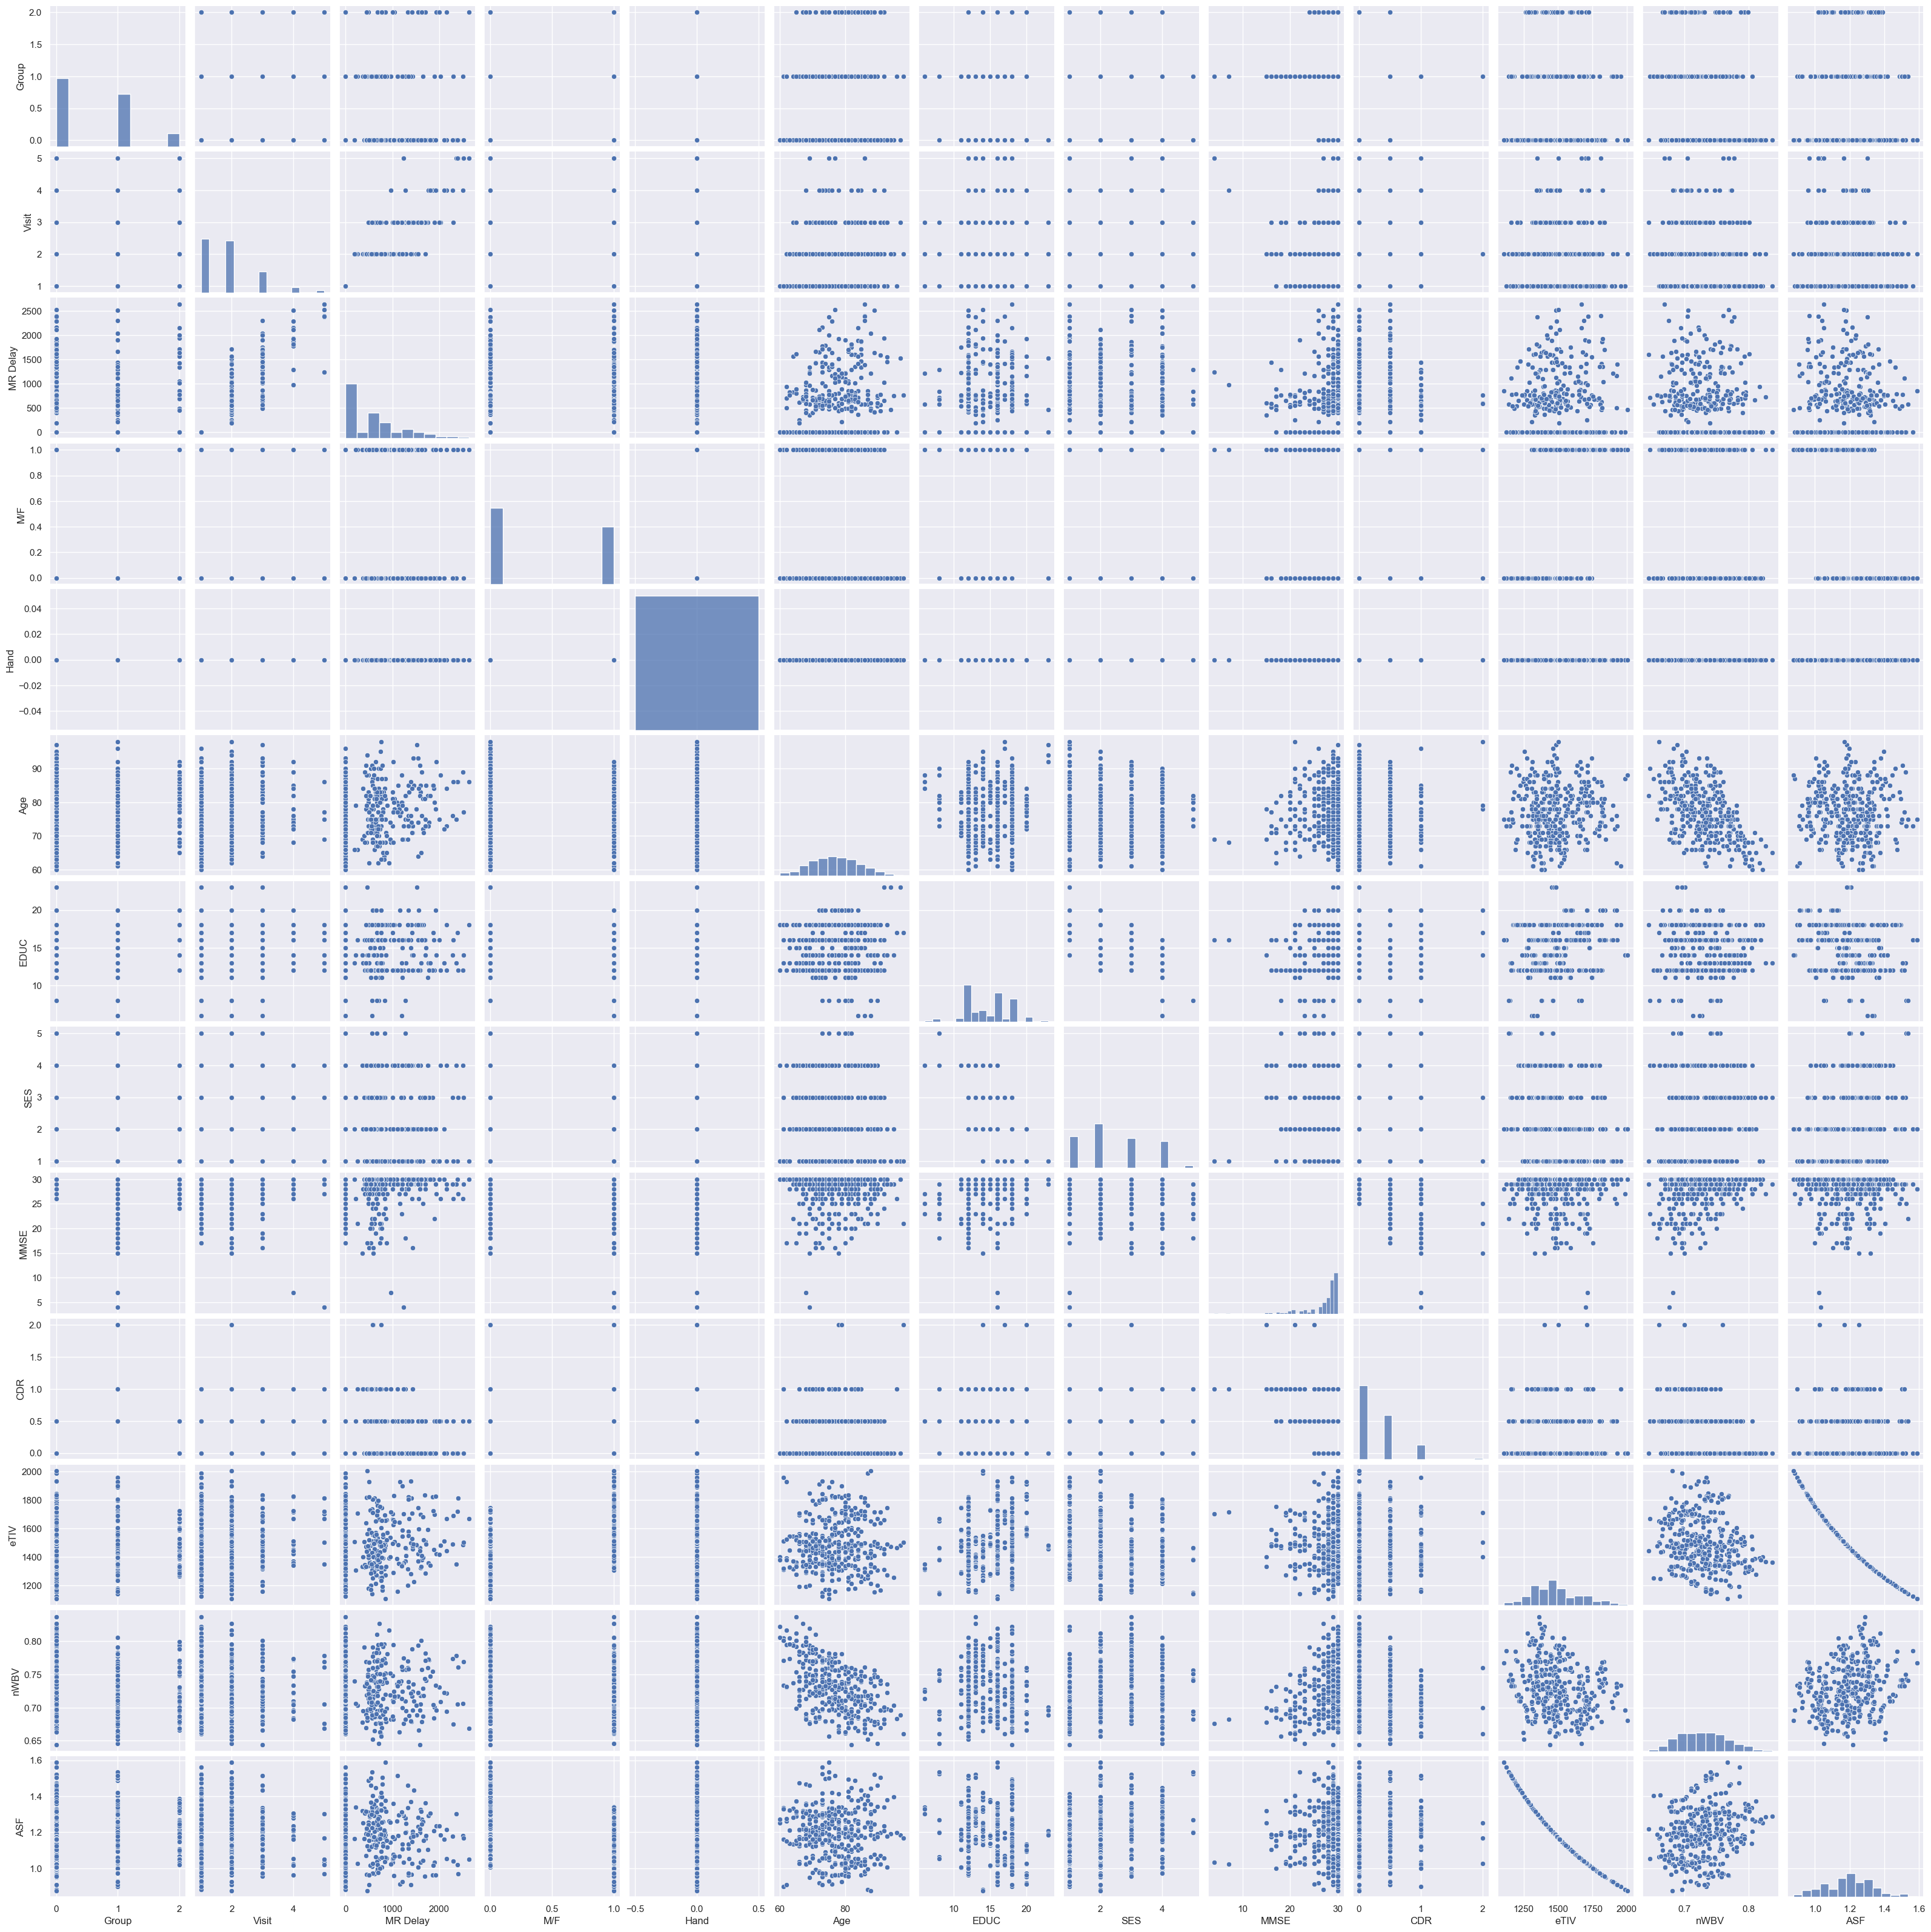

In [280]:
sns.set(rc={'figure.figsize':(60,30)})
sns.pairplot(df_copy)
plt.show()

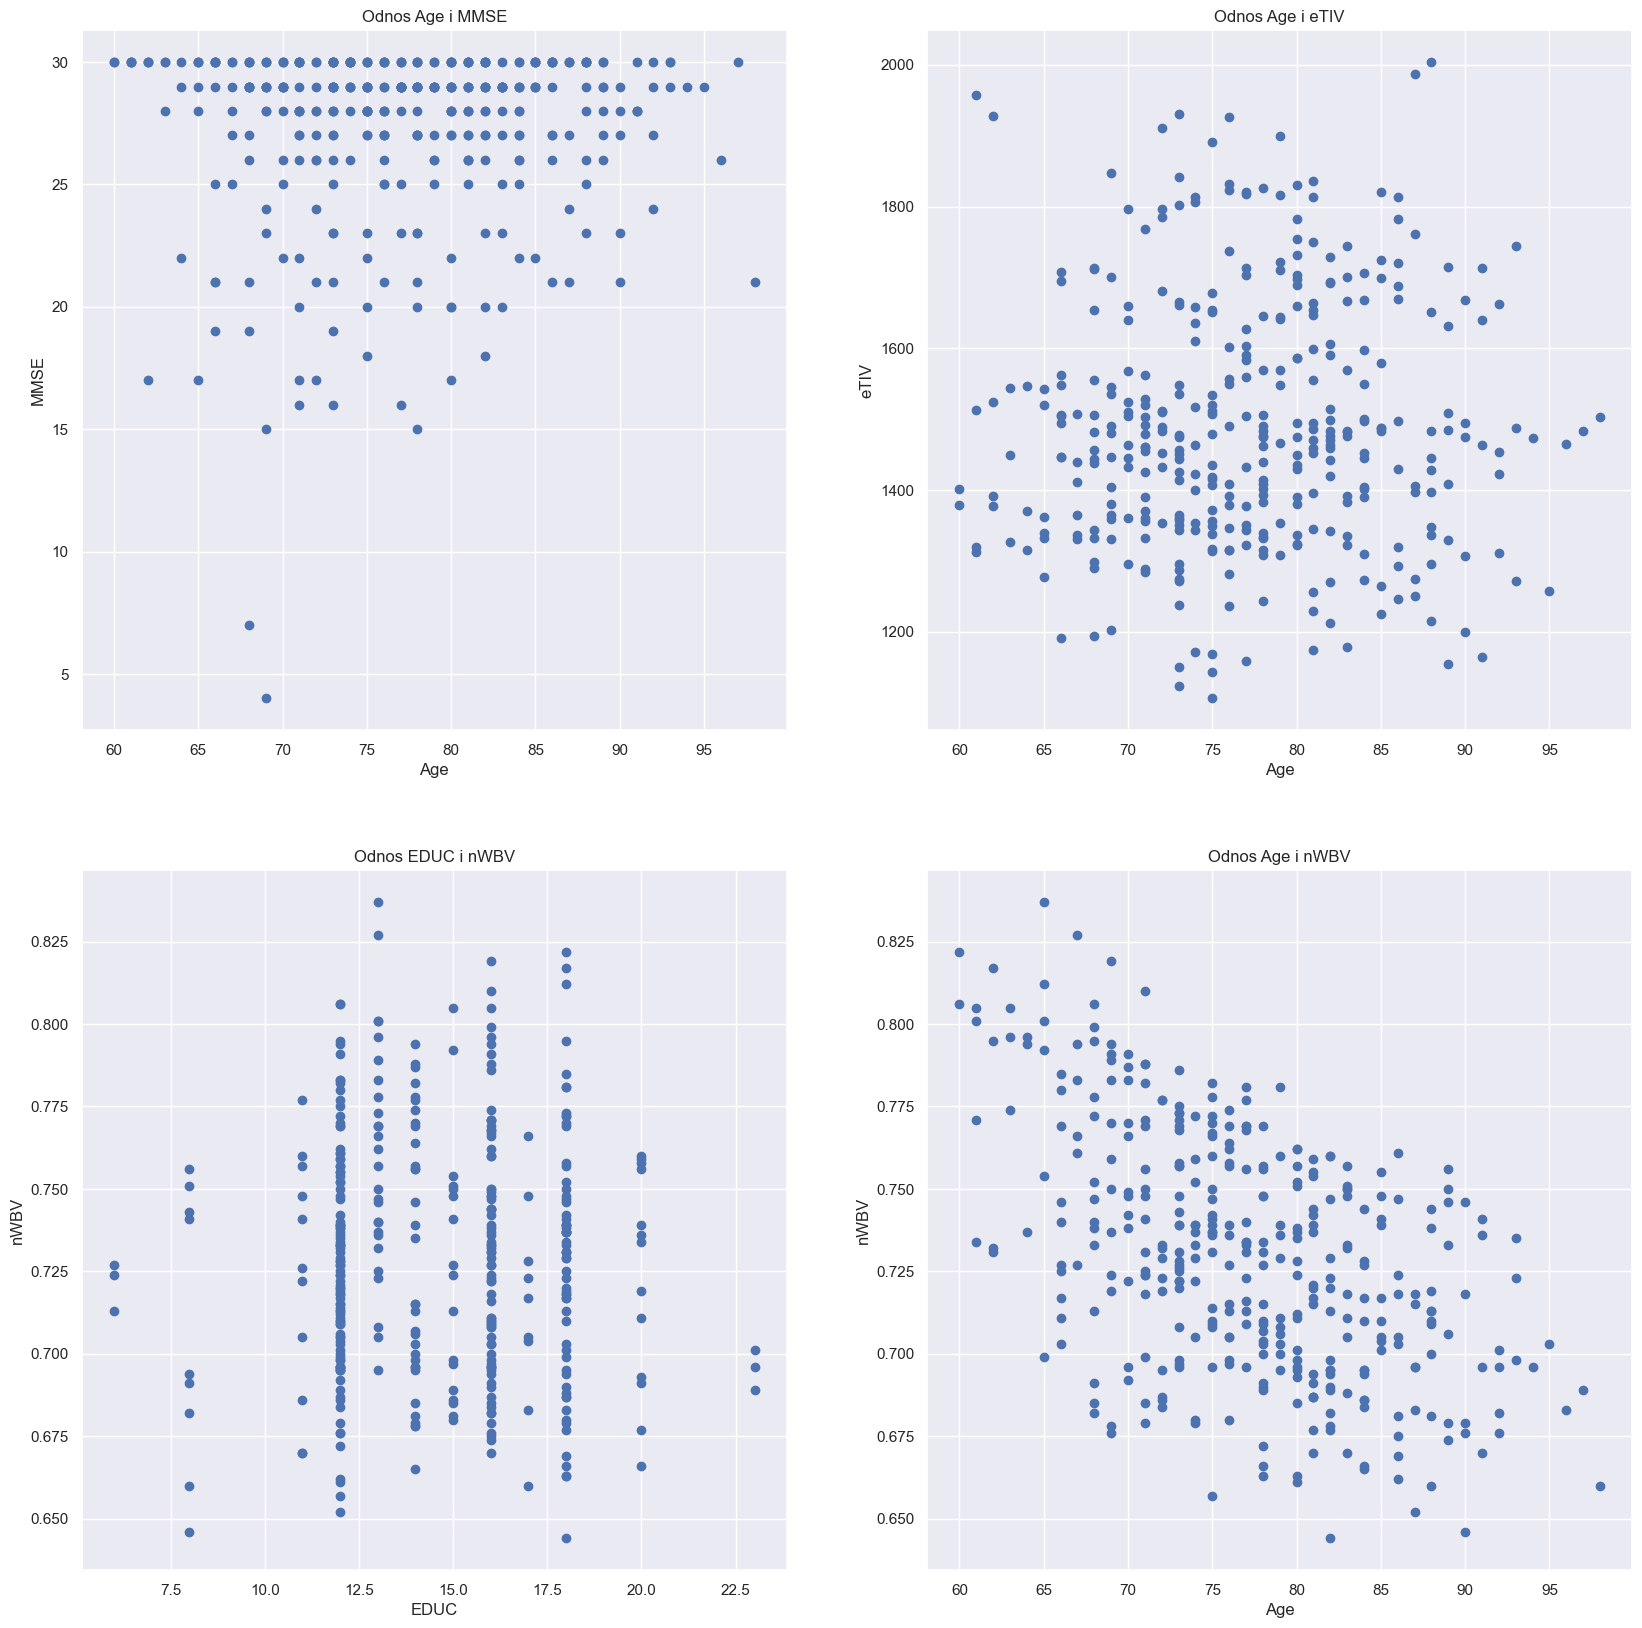

In [281]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
plt.scatter(df_copy['Age'], df_copy['MMSE'])
plt.xlabel('Age')
plt.ylabel('MMSE')
plt.title('Odnos Age i MMSE')

plt.subplot(2,2,2)
plt.scatter(df_copy['Age'], df_copy['eTIV'])
plt.xlabel('Age')
plt.ylabel('eTIV')
plt.title('Odnos Age i eTIV')

plt.subplot(2,2,3)
plt.scatter(df_copy['EDUC'], df_copy['nWBV'])
plt.xlabel('EDUC')
plt.ylabel('nWBV')
plt.title('Odnos EDUC i nWBV')

plt.subplot(2,2,4)
plt.scatter(df_copy['Age'], df_copy['nWBV'])
plt.xlabel('Age')
plt.ylabel('nWBV')
plt.title('Odnos Age i nWBV')


plt.show()

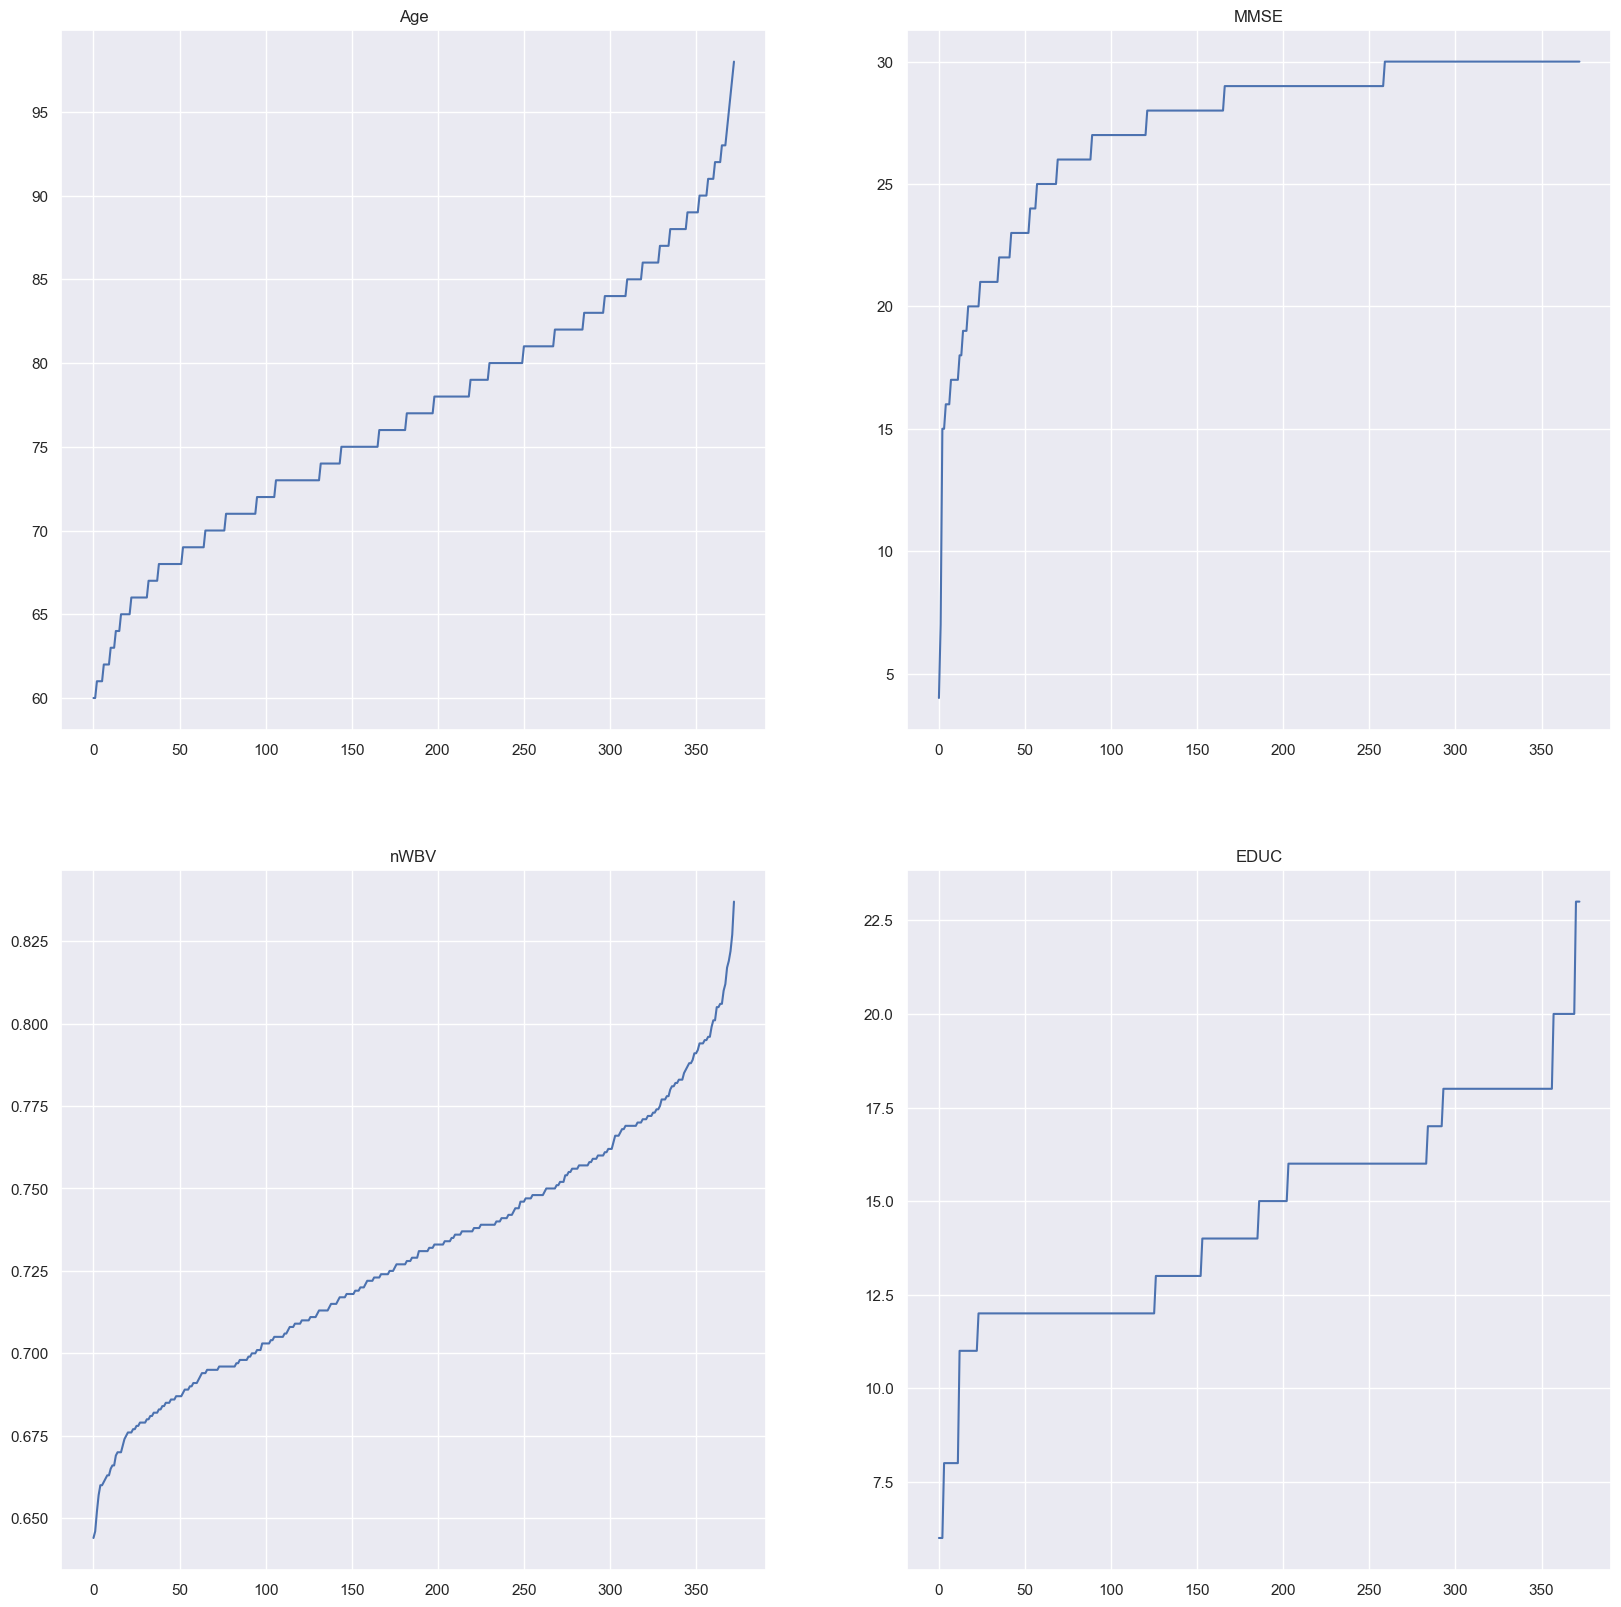

In [282]:
plt.figure(figsize=(20,20))

sorted_age = df_copy.sort_values(by=['Age'])['Age'].values
plt.subplot(2,2,1)
plt.plot(sorted_age)
plt.title('Age')

sorted_mmse = df_copy.sort_values(by=['MMSE'])['MMSE'].values
plt.subplot(2,2,2)
plt.plot(sorted_mmse)
plt.title('MMSE')

sorted_nwbv = df_copy.sort_values(by=['nWBV'])['nWBV'].values
plt.subplot(2,2,3)
plt.plot(sorted_nwbv)
plt.title('nWBV')

sorted_educ = df_copy.sort_values(by=['EDUC'])['EDUC'].values
plt.subplot(2,2,4)
plt.plot(sorted_educ)
plt.title('EDUC')


plt.show()

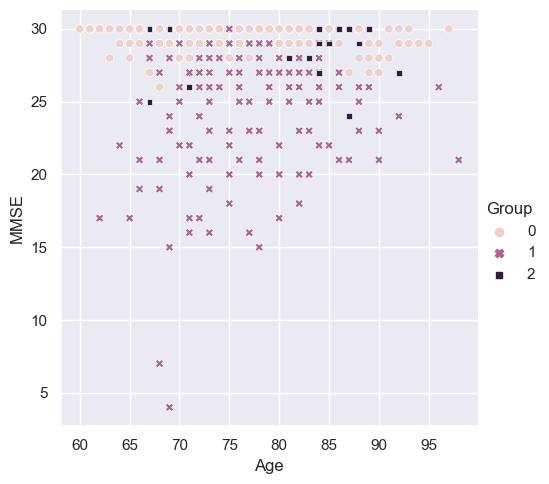

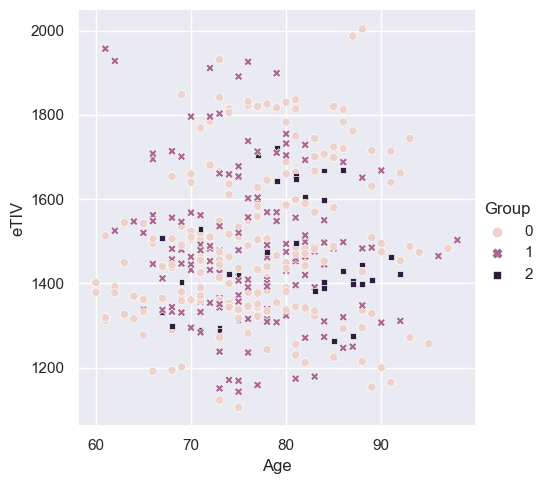

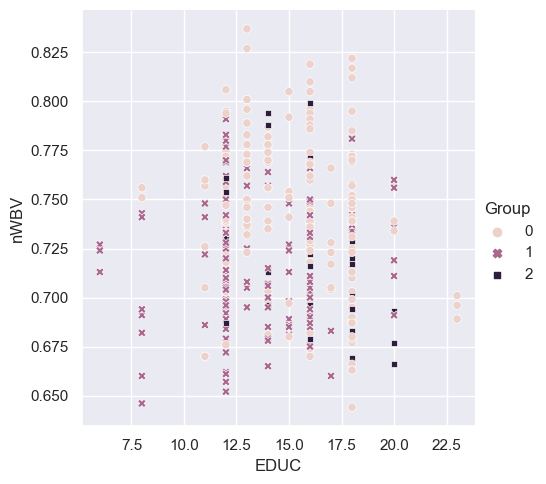

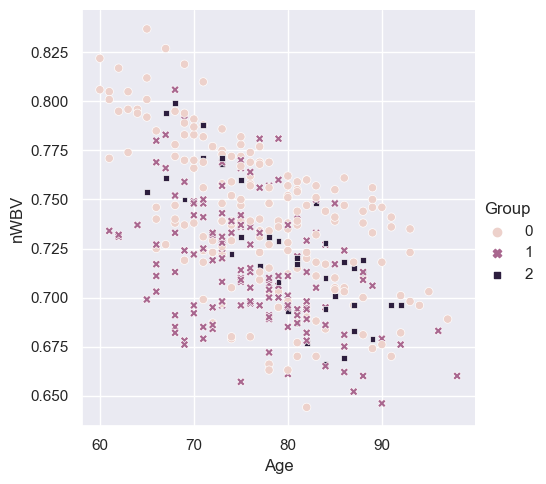

In [283]:
sns.set(rc={'figure.figsize':(5,5)})
sns.relplot(
    data=df_copy,
    x="Age", y="MMSE",
    hue="Group", style="Group")

sns.set(rc={'figure.figsize':(5,5)})
sns.relplot(
    data=df_copy,
    x="Age", y="eTIV",
    hue="Group", style="Group")

sns.set(rc={'figure.figsize':(5,5)})
sns.relplot(
    data=df_copy,
    x="EDUC", y="nWBV",
    hue="Group", style="Group")

sns.set(rc={'figure.figsize':(5,5)})
sns.relplot(
    data=df_copy,
    x="Age", y="nWBV",
    hue="Group", style="Group")

plt.show()

### 5. Analiza korelacije i zavisnosti

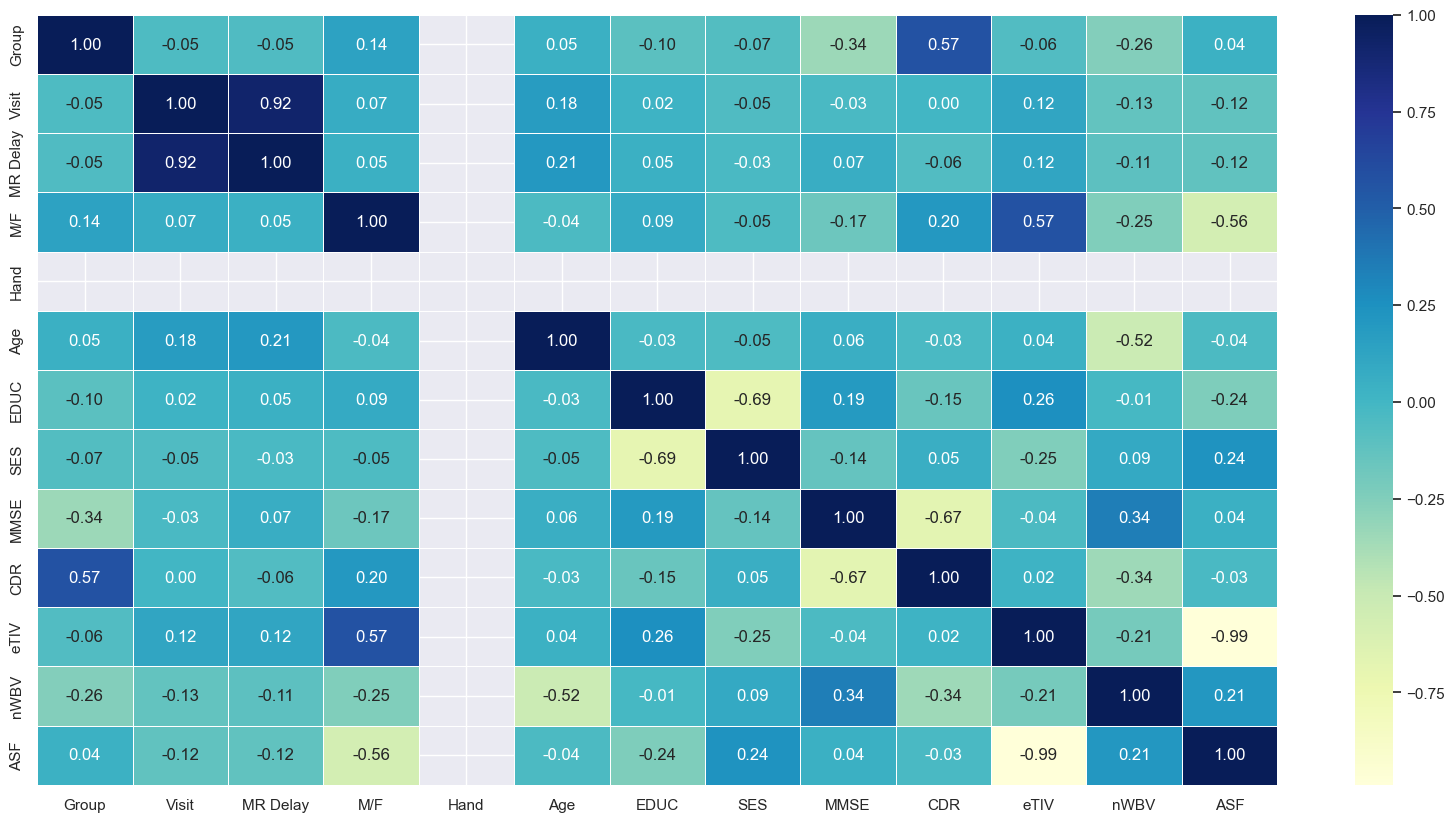

In [355]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(df_copy.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)

plt.show()

# Replikacija rezultata

Za drugu provjeru u prvom dijelu projekta studenti koriste pristupe iz odabranog članka kako bi replicirali prikazane rezultate. Pri samoj implementaciji studenti mogu koristiti već implementirane funkcije iz paketa kao što su numpy, scikit-learn i sl. Jednom kada su metode implementirane, potrebno ih je pokrenuti na ranije pripremljenim podacima, korektno evaluirati, usporediti s rezultatima iz članka i objasniti eventualne razlike.
Primjerice, ako radite na klasifikacijskom problemu preporučljivo je prikazati:  
- vrijednost metrika kao što su točnost, preciznost, odziv, itd.  
- AUC/ROC krivulje  
- matrice zabune  
- . . .  

Studenti, naravno, slobodno mogu prikazati rezultate i na alternativne načine koji im se čine interesantni. U slučaju da se izabrani članak bavi specifičnom problematikom, preporučljivo je kontaktirati nadležnog asistenta za savjet.

Rok predaje: **15.12.2023.**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

In [46]:
#df_copy je dataframe sređen u prvoj fazi projekta

df_modified = df_copy.groupby("Subject ID").first().reset_index()
df_modified = df_modified.drop(['Subject ID', 'MRI ID', 'MR Delay', 'Visit', 'CDR'], axis=1)
#df_modified = df_copy.drop(['Subject ID', 'MRI ID', 'MR Delay', 'Visit'], axis=1)

df_modified['Group'] = df_modified['Group'].replace(2, 1)

X = df_modified.drop(['Group'], axis=1)
y = df_modified['Group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

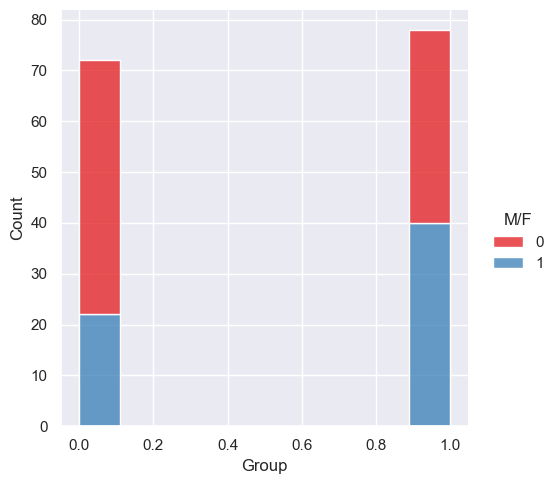

In [47]:
sns.set(rc={'figure.figsize':(8,6)})
group_labels = ['Nondemented', 'Demented']
sns.displot(data=df_modified, x="Group", hue="M/F", multiple="stack", palette="Set1")
plt.show()

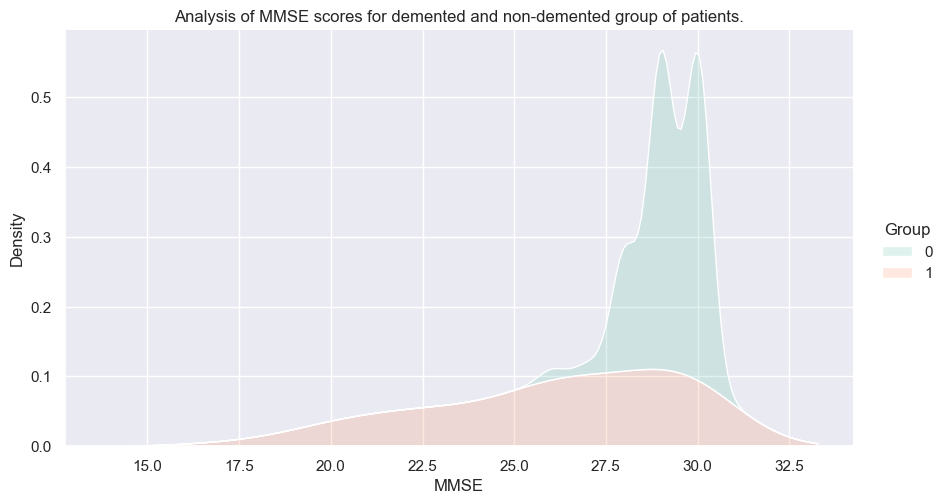

In [31]:
sns.set(rc={'figure.figsize':(10,20)})
sns.displot(data=df_modified, x="MMSE", hue="Group", multiple="stack", kind="kde", fill=True, common_norm=False, alpha=0.2, palette="Set2", height=5, aspect=16/9)
plt.title("Analysis of MMSE scores for demented and non-demented group of patients.")
plt.show()

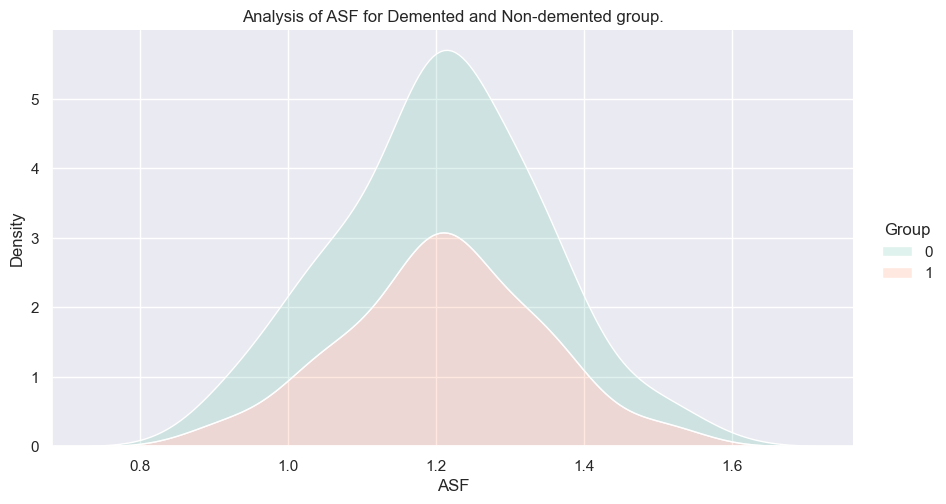

In [32]:
sns.set(rc={'figure.figsize':(10,20)})
sns.displot(data=df_modified, x="ASF", hue="Group", multiple="stack", kind="kde", fill=True, common_norm=False, alpha=0.2, palette="Set2", height=5, aspect=16/9)
plt.title("Analysis of ASF for Demented and Non-demented group.")
plt.show()

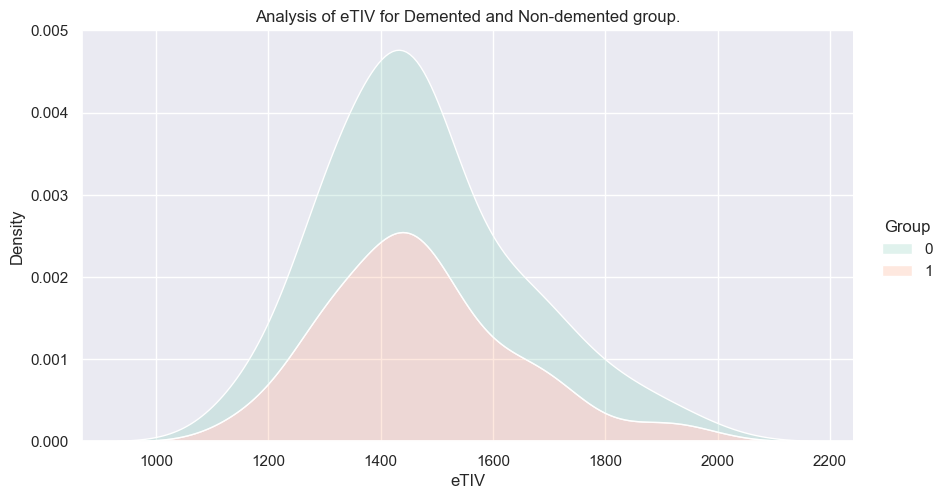

In [33]:
sns.set(rc={'figure.figsize':(10,20)})
sns.displot(data=df_modified, x="eTIV", hue="Group", multiple="stack", kind="kde", fill=True, common_norm=False, alpha=0.2, palette="Set2", height=5, aspect=16/9)
plt.title("Analysis of eTIV for Demented and Non-demented group.")
plt.show()

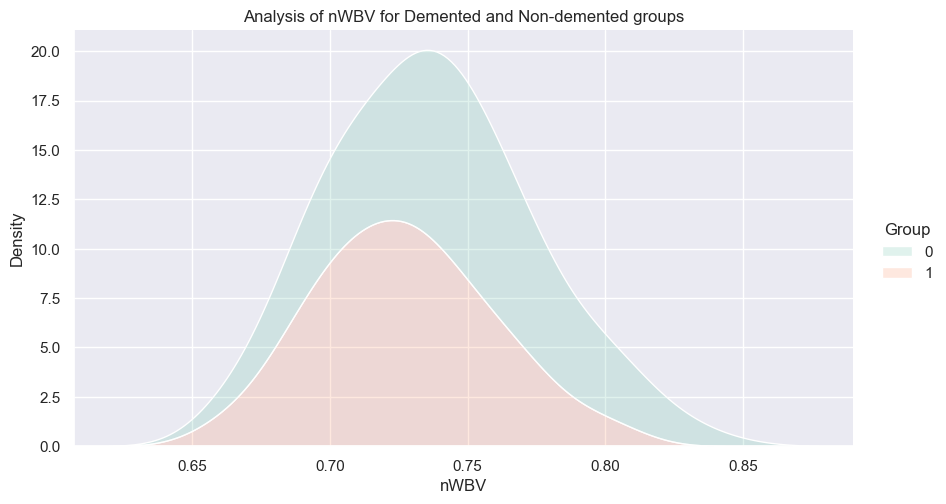

In [34]:
sns.set(rc={'figure.figsize':(10,20)})
sns.displot(data=df_modified, x="nWBV", hue="Group", multiple="stack", kind="kde", fill=True, common_norm=False, alpha=0.2, palette="Set2", height=5, aspect=16/9)
plt.title('Analysis of nWBV for Demented and Non-demented groups')
plt.show()

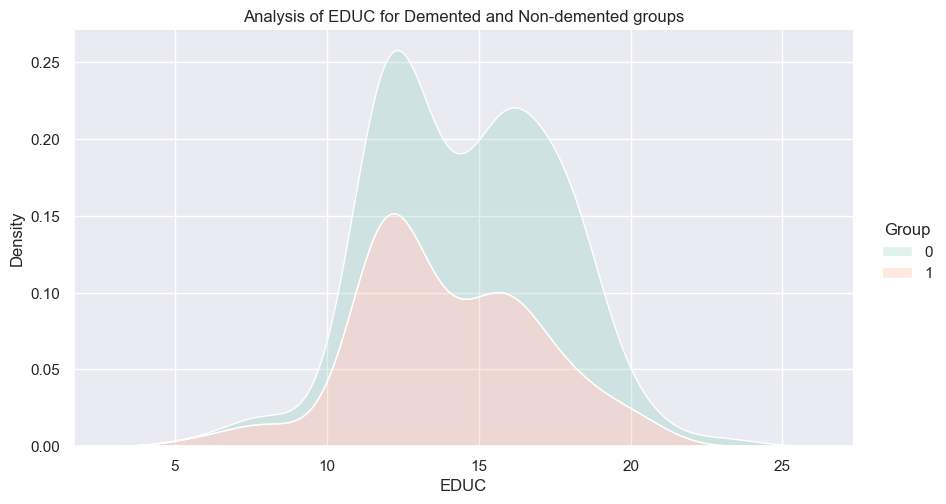

In [35]:
sns.set(rc={'figure.figsize':(10,20)})
sns.displot(data=df_modified, x="EDUC", hue="Group", multiple="stack", kind="kde", fill=True, common_norm=False, alpha=0.2, palette="Set2", height=5, aspect=16/9)
plt.title('Analysis of EDUC for Demented and Non-demented groups')
plt.show()

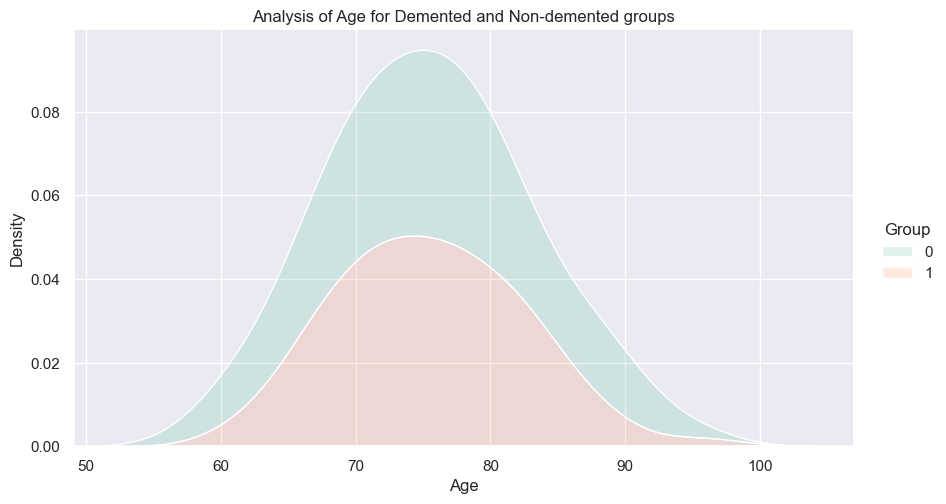

In [36]:
sns.set(rc={'figure.figsize':(10,20)})
sns.displot(data=df_modified, x="Age", hue="Group", multiple="stack", kind="kde", fill=True, common_norm=False, alpha=0.2, palette="Set2", height=5, aspect=16/9)
plt.title('Analysis of Age for Demented and Non-demented groups')
plt.show()

#### Evaluacija modela

In [48]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

metrics = {}

def evaluate(y_true, y_pred, model, model_name):
    acc_score = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1_s = f1_score(y_true, y_pred, average='weighted', zero_division=1)
    confusion_mat = confusion_matrix(y_true, y_pred)
    
    metrics[model_name] = {"Accuracy": acc_score,
                          "Precision": precision,
                          "Recall": recall,
                          "F1-score": f1_s}
    
    print(f"Accuracy: {acc_score*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1_s:.2f}")

    
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)

    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr)
    plt.title("AUC/ROC krivulja")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

### Decision tree classifier

Decision tree classifier

Accuracy: 56.67%
Precision: 0.66
Recall: 0.57
F1 score: 0.55


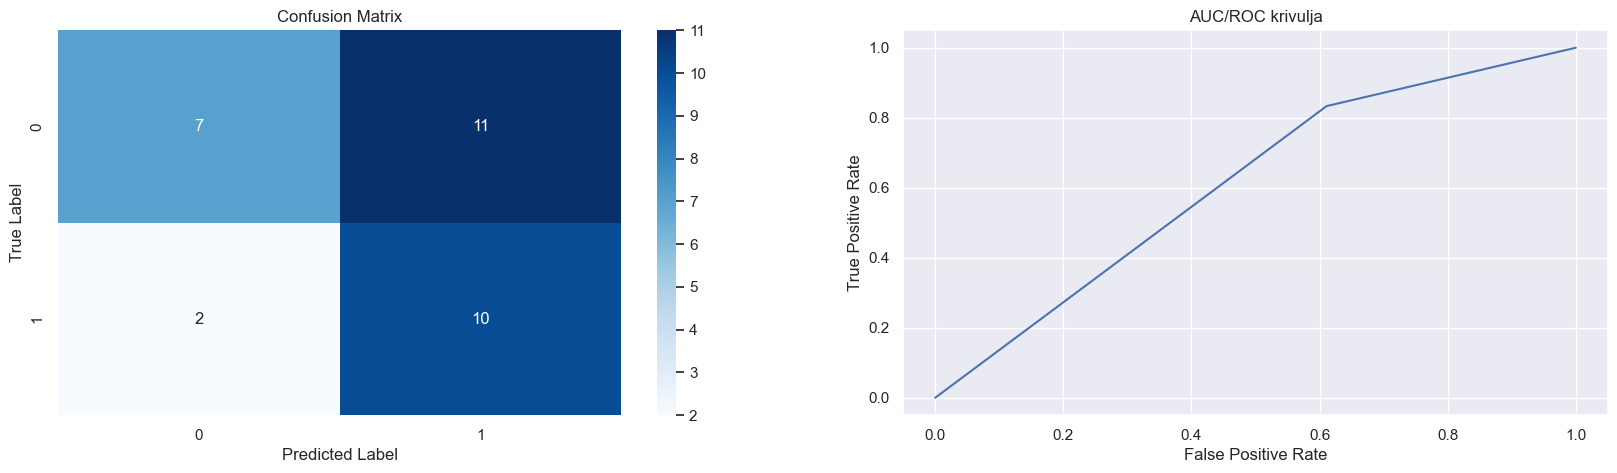

In [50]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

print("Decision tree classifier\n")
evaluate(y_test, dt_pred, dt_model, "Decision tree classifier")

### Random forest classifier

Random forest classifier

Accuracy: 73.33%
Precision: 0.76
Recall: 0.73
F1 score: 0.74


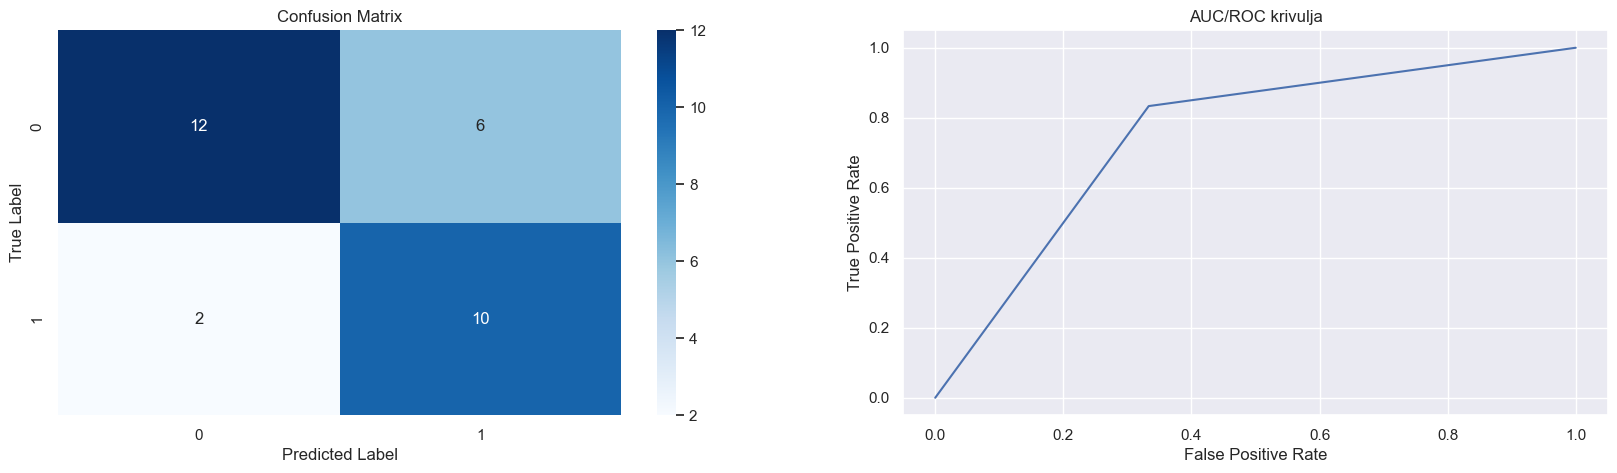

In [51]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("Random forest classifier\n")
evaluate(y_test, rf_pred, rf_model, "Random forest classifier")

### Support vector machine

Support vector machine classifier

Accuracy: 73.33%
Precision: 0.74
Recall: 0.73
F1 score: 0.74


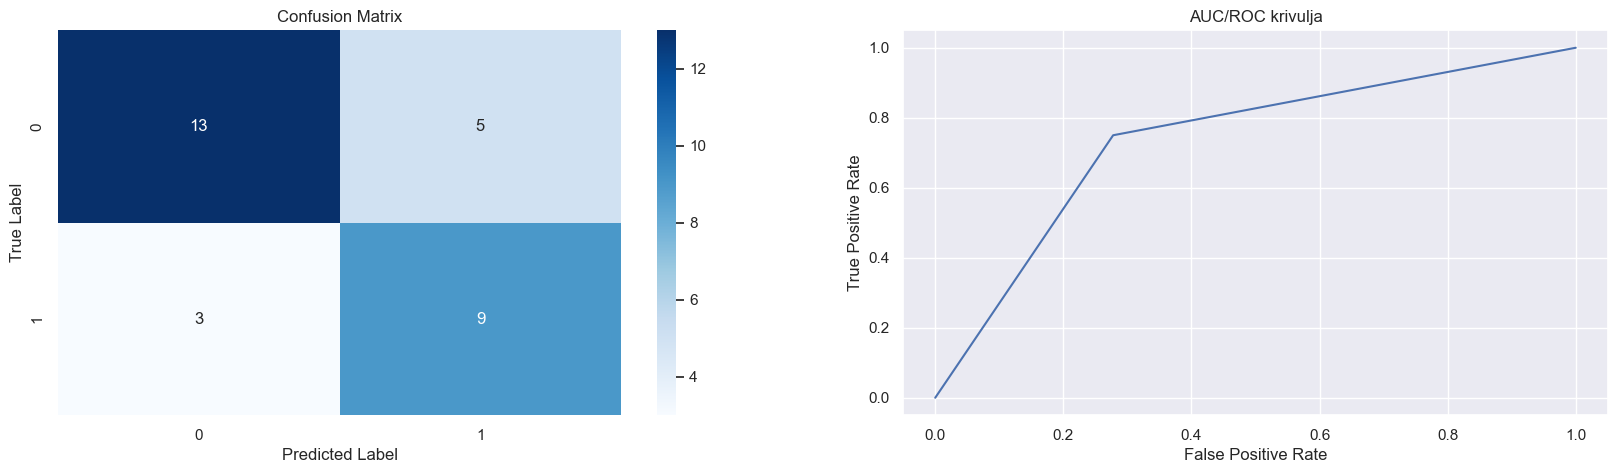

In [52]:
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)

print("Support vector machine classifier\n")
evaluate(y_test, svm_pred, svm_model, "SVM classifier" )

### XGBoost

XGBoost classifier

Accuracy: 66.67%
Precision: 0.70
Recall: 0.67
F1 score: 0.67


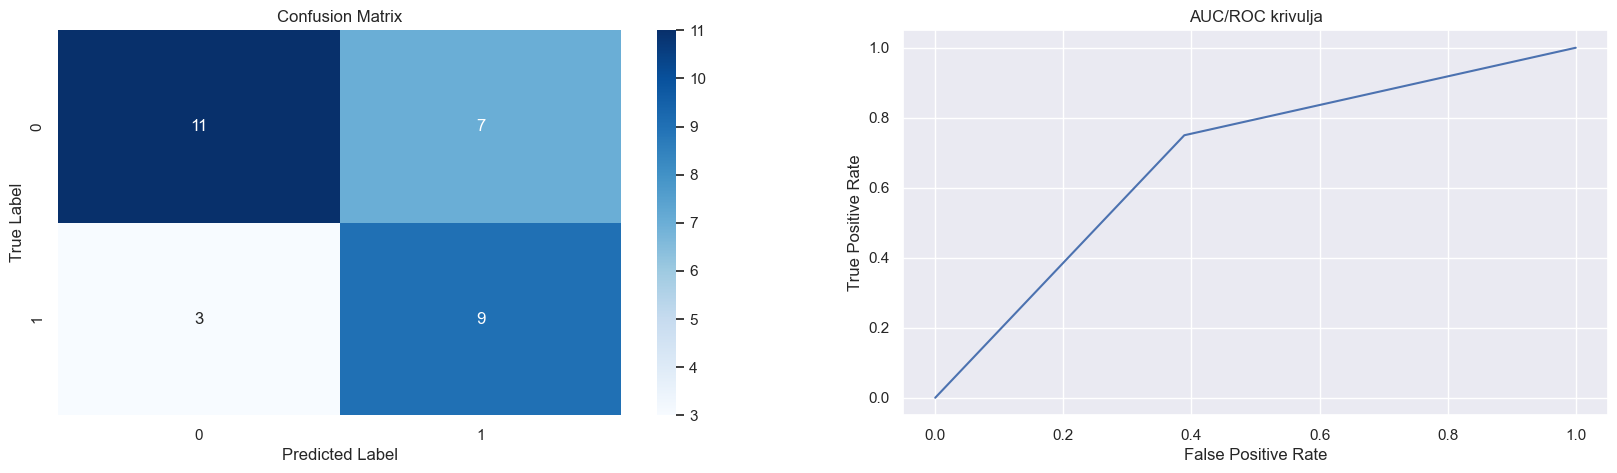

In [53]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

print("XGBoost classifier\n")
evaluate(y_test, xgb_pred, xgb_model, "XGBoost classifier")

### Voting classifier

Voting classifier

Accuracy: 63.33%
Precision: 0.67
Recall: 0.63
F1 score: 0.64


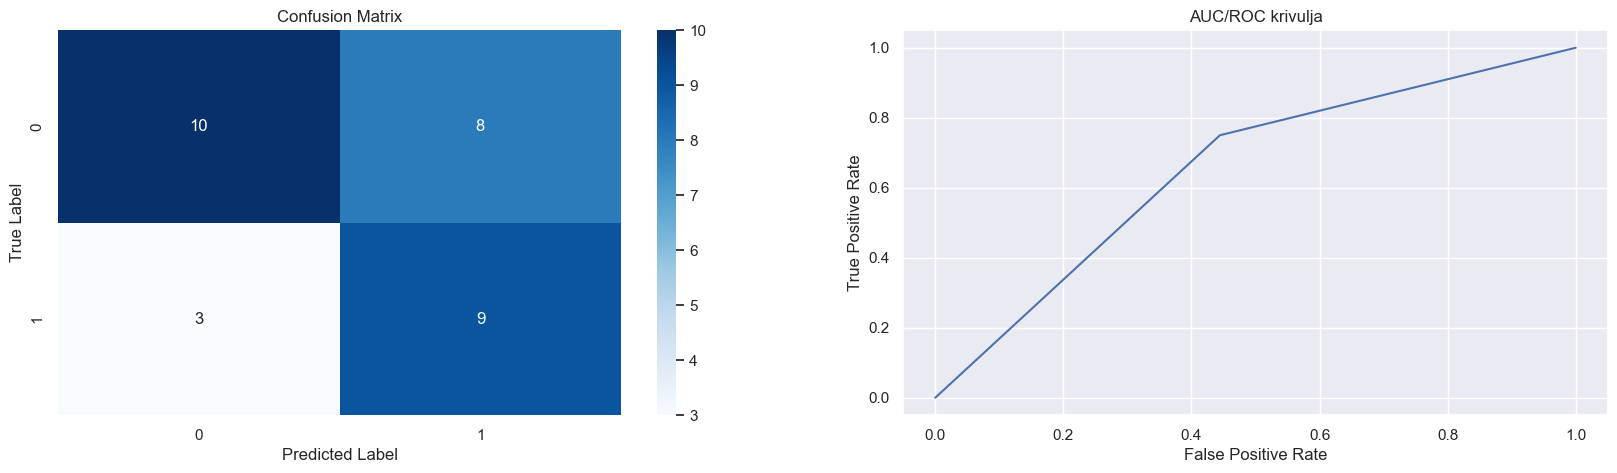

In [54]:
estimators = [('dt', dt_model), ('svm', svm_model), ('rf', rf_model), ('xgb', xgb_model)]
voting_model = VotingClassifier(estimators = estimators, voting = 'soft')
voting_model.fit(X_train, y_train)

voting_pred = voting_model.predict(X_test)

print("Voting classifier\n")
evaluate(y_test, voting_pred, voting_model, "Voting classifier")

#### Usporedba performansi svih modela

In [55]:
#print("{:<30} {:<15} {:<15} {:<15} {:<15}".format("Metoda", "Accuracy(%)", "Precision", "Recall", "F1-score"))
#print("---------------------------------------------------------------------------------------")
#for model, scores in metrics.items():
#   print(f"{model:<30} {scores['Accuracy']*100:<15.2f} {scores['Precision']:<15.2f} {scores['Recall']:<15.2f} {scores['F1-score']:<15.2f}")

In [56]:
df_metrics = pd.DataFrame.from_dict(metrics, orient='index')
df_metrics.head()

,Accuracy,Precision,Recall,F1-score
Decision tree classifier,0.566667,0.657143,0.566667,0.553535
Random forest classifier,0.733333,0.764286,0.733333,0.735714
SVM classifier,0.733333,0.744643,0.733333,0.735747
XGBoost classifier,0.666667,0.696429,0.666667,0.669643
Voting classifier,0.633333,0.673303,0.633333,0.635373


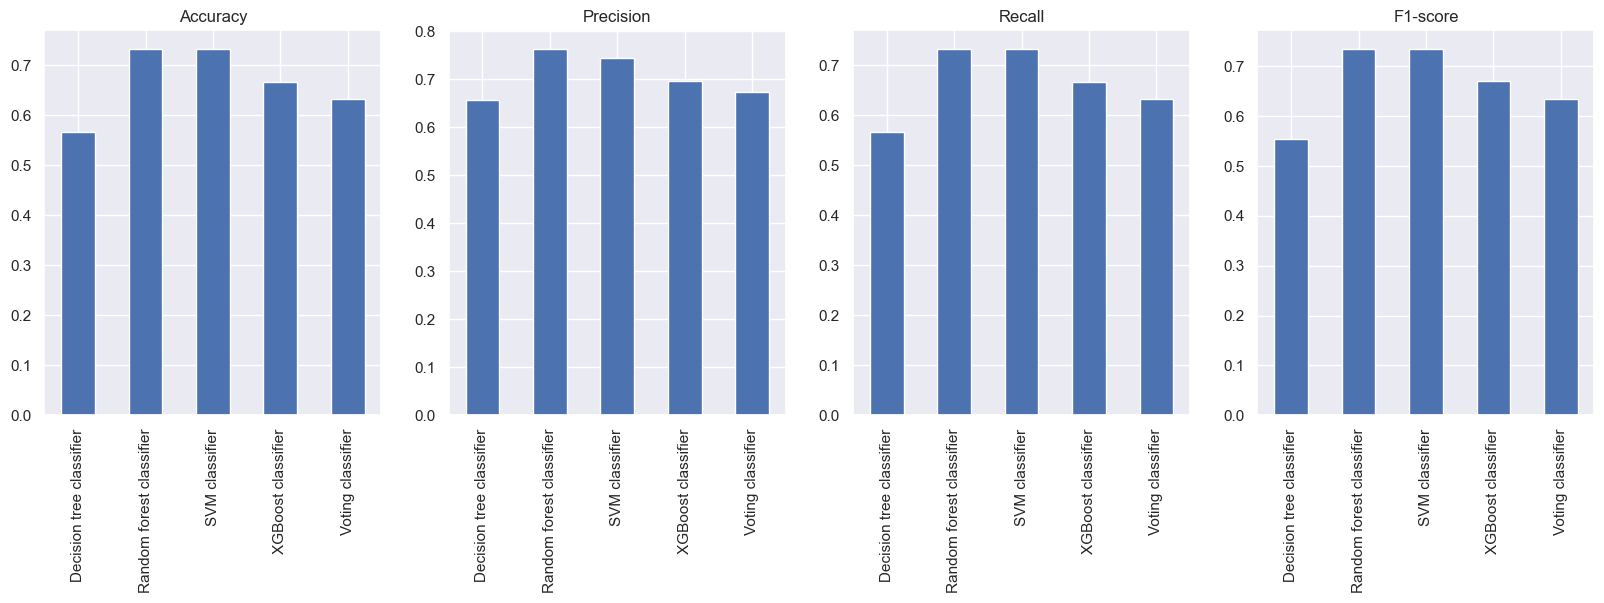

In [57]:
plt.figure(figsize=(20,5))
for i, metric in enumerate(df_metrics.columns):
    plt.subplot(1, 4, i + 1)
    df_metrics[metric].plot(kind='bar')
    plt.title(f'{metric}')

# Poboljšanje rezultata

U drugom dijelu projekta cilj je poboljšati rezultate znanstvenog članka. Drugi dio projekta se
radi u grupama od tri studenta (eventualno dva). Neki od načina na koje možete pokušati
poboljšati rezultate su:  
- ispraviti eventualne nedostatke članka  
- proširiti podatke inženjerstvom značajki  
- primijeniti neke od metoda/algoritama obrađenih na predavanjima  
- optimirati parametre  
- kreirati vlastitu metodu  
- …  

Svako potencijalno poboljšanje mora biti zasebno evaluirano i uspoređeno s originalnim
rezultatima članka. U slučaju da poboljšanje nije postignuto, potrebno je komentirati koji je
uzrok tome i što bi se još moglo pokušati a da je trenutno izvan vaših mogućnosti.  

Na kraju ove faze potrebno je napraviti i kratku video prezentaciju u trajanju od 4 minute u
kojoj ćete prezentirati članak i isprobana poboljšanja. Video prezentaciju potrebno je
postaviti u GitHub repozitorij.  

Nekoliko najboljih poboljšanja rezultata članaka izabrat će asistenti i predložiti za
prezentaciju (puštanje snimljene video prezentacije + diskusija) tijekom zadnjeg tjedna
nastave.  

Rok predaje: **19.01.2024.**


**Članovi grupe:**  

**Mia Bošnjak,  
Petra Petrović,   
Veronika Žunar, 0036525058**  